<center>
<img src="https://repository-images.githubusercontent.com/286819592/b82e14cf-3c85-4f91-84c0-bea095c353a8" width=800 height=500 />
</center>

# Table of Contents
<a id="toc"></a>
- [1. Introduction](#1)
- [2. Imports](#2)
    - [2.1 Function](#2.1)
        - [2.1.1 Residual Plot](#2.1.1)
        - [2.1.2 Detection Values](#2.1.2)
        - [2.1.3 Visualize 3 plots](#2.1.3)
        - [2.1.4 Visualize categorical feaures](#2.1.4)
        - [2.1.5 Prepocessing](#2.1.5)
        - [2.1.6 Feature selection(VIF and P-values)](#2.1.6)
        - [2.1.7 Model Checking](#2.1.7)
- [3. Data Loading](#3)
    - [3.1 Basic Understanding](#3.1)
        - [ Detect missing values](#3.1.1)
    - [3.2 Data clearning](#3.2)
        - [Handling Missing vlaues](#3.2.1)
- [4. EDA](#4)
    - [4.1 Overview of Data](#4.1)
    - [4.2 Feature Distribution of Continous Features](#4.2)
    - [4.3 Feature Distribution of Categorical Features](#4.3)
    - [4.4 Target Distribution ](#4.4)
    - [4.5 Correlation Matrix ](#4.5)
    - [4.6 Feature Engineering](#4.6)
- [5. Data Pre-Processing](#5)    
    - [5.1 Handling outlier](#5.1)
    - [5.2 Encoding](#5.2)
- [6. Modeling](#6)
    - [6.1 Linear Regression](#6.1)
    - [6.2 Ridge Regression](#6.2)
    - [6.3 Lasso Regression](#6.3)
    - [6.4 Polynomail Regression](#6.4)
- [7. Conclution](#7)   

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id="1"></a>
<span style="color:#00BFC4;">Introduction</span>
</p>
</div>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Car Price Prediction:</u></b><br>
 
The automobile market in Cambodia has been growing rapidly in recent years, with an increasing number of car buyers seeking to purchase new and used cars. As a result, there has been a growing interest in determining the factors that influence car prices in Cambodia. In this study, we aim to explore the relationship between various car features and their impact on car prices in the Cambodian market.

To achieve this goal, we collected data on car prices and features from Khmer24, one of the largest online marketplaces for cars in Cambodia. We scraped the data and compiled a dataset containing information on various car features such as make, model, year, and transmission type, as well as their corresponding prices.
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id="2"></a>
<span style="color:#00BFC4;">Imports</span>
</p>
</div>

In [103]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import normaltest
import statsmodels.api as sm 
from scipy.stats import boxcox

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


from IPython.display import clear_output
# !pip3 install -U lazypredict
# !pip3 install -U pandas #Upgrading pandas

# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

pd.options.display.float_format = '{:.4f}'.format
%matplotlib inline
clear_output()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id="2.1"></a>
<span style="color:#00BFC4;">Function</span>
</p>
</div>

### <a id = '2.1.1'> Residual Plot </a> 

In [2]:
def residual_plot(X_train, X_test, y_train, y_test, lm):
    
    lm.fit(X_train, y_train)
    y_test_pred = lm.predict(X_test)
    residuals = y_test - y_test_pred
    
    print('Normal test:', normaltest(residuals))
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 3, 1)
    sns.distplot(residuals, bins=20)
    plt.title('Distribution of Residuals')
    plt.xlabel('Errors')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 2)
    plt.scatter(y_test, y_test_pred, label="Predicted vs Actual")
    plt.plot(y_test, y_test, 'r', label="Perfect Prediction")
    plt.title('Predicted vs Actual')
    plt.xlabel('Actual prices')
    plt.ylabel('Predicted prices')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
    sns.distplot(y_test_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    

    sm.qqplot(residuals, line='s')
    plt.title('QQ Plot of Residuals')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    
    plt.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### <a id = '2.1.2'>Detection Values </a>

In [3]:
def check_column_value(df, value):
    """
    Checks if each column in a pandas DataFrame contains a specific value and prints the column names that contain the value.
    
    Parameters:
        df (pandas DataFrame): The DataFrame to check.
        value (any type): The value to look for in each column.
    
    Return: 
        The functoin will return indexs of the values in dataframe
    """
    if type(value) != str:
        values = list(value)
    elif type(value) == list():
        values = value
    else: values = [value]
    matching_columns = df.apply(lambda col: col.isin(values).any())
    matching_columns = matching_columns[matching_columns == True]
    count = {}
    index = set()
    for value in values:
        for col in matching_columns.index.tolist():
            if count == {}:
                count[col] = []
            elif col not in count:
                count[col] = []
            
            count[col].append(df[df[col] == value].loc[:, col].count())
            for i in df[df[col] == value].loc[:, col].index.tolist():
                index.add(i)
  
    print(f"\033[94mColumns that contain the {values}:\n")
    print(pd.Series(count))
    
    return index
    

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### <a id = '2.1.3'> Visualize 3 plots </a>

In [ ]:
def plotting_3_chart(data, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(data.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(data.loc[:,feature], orient='v', ax = ax3);

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### <a id = '2.1.4'> Visualize Categorical Features </a> 

In [ ]:
def categorical_visualization(cols, target):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y=target,data=df,palette="Set2")
    plt.title(f"{cols} vs {target}",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(df.groupby(cols)[target].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y=target,data=x,palette="Set2")
    plt.title(f"{cols} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### <a id = '2.1.5'> Prepocessing </a>  

In [ ]:
def insight_range_price(car_make_Budget, car_model_Budget, df_Budget, range_price):
    print(f'\033[94m')
    print(f'The total number of Car brands and Car models in range of {range_price} prices',df_Budget.shape[0])
    print(f'The total number of Car brands in range of {range_price} prices', len(car_make_Budget))
    print(f'The total number of Car models in range of {range_price} prices', len(car_model_Budget))

def dummy(new_df, categorical_features, threshold=None):
    if threshold is None:
        threshold = np.max(new_df[categorical_features].nunique().values.tolist())
    cat_feature = [feature for feature in categorical_features if new_df[feature].nunique() <= threshold]
    df_dummy = pd.get_dummies(columns=cat_feature, data=new_df)
    return df_dummy, cat_feature

def target_encodnig(df_ro, include, target):
    import category_encoders as ce
    from sklearn.model_selection import train_test_split

    df_target = df_ro.copy()
    categorical_features_target = df_target.select_dtypes(include=include).columns.tolist() 

    # Split the data into training and validation sets
    train, val = train_test_split(df_target, test_size=0.3, random_state=42)

    # Initialize the target encoder
    target_encoder = ce.TargetEncoder(cols= categorical_features_target)

    target_encoder.fit(train[categorical_features_target], train[target])

    # Encode the categorical variable for both training and validation data
    train_encoded = target_encoder.transform(train[categorical_features_target])
    val_encoded = target_encoder.transform(val[categorical_features_target])

    # Combine the encoded variable with the original data
    train = pd.concat([train.drop(categorical_features_target, axis=1), train_encoded], axis=1)
    val = pd.concat([val.drop(categorical_features_target, axis=1), val_encoded], axis=1)
    y_train = train.pop(target)
    y_test = val.pop(target)
    
    X_train = train
    X_test = val
    
    return X_train, X_test, y_train, y_test

def scaler_df(df, numerical_features):
    scaler = StandardScaler()
    numerical_features = scaler.fit_transform(df[[numerical_features]])
    return numerical_features

# from scipy import stats
from scipy import *

def boxcox(new_df, col):

    # Box-Cox transformation
    transformed_data, lambda_param = stats.boxcox(new_df[col])

    Boxcox = pd.Series(transformed_data)
    
    t=sns.distplot(Boxcox,label="Skewness: %.2f"%(Boxcox.skew()) )
    t.legend()
    return Boxcox, lambda_param

# Creat function to transform
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def scaler_df(df, numerical_features, scaler):
    X = df.copy()
    X[numerical_features] = scaler.fit_transform(X[numerical_features])
    return X

# func to Interquartile Range Method
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

def visulize_outlier(df, col):
    out_iqr(df, col)
    plt.figure(figsize = (10,6))
    sns.distplot(df[col], kde=False)
    plt.axvspan(xmin = lower,xmax= df[col].min(),alpha=0.2, color='red')
    plt.axvspan(xmin = upper,xmax= df[col].max(),alpha=0.2, color='red')
    plt.show()

def outlier_detection(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    upper_end = Q3+1.5*IQR
    lower_end = Q1 - 1.5*IQR
    outlier = df[(df>upper_end) | (df<lower_end)]
    return outlier

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### <a id = '2.1.6'> Feature Selection </a> 

In [80]:
def drop_high_pvalue_features(X, y, alpha=0.05):
    """
    Drops one feature at a time based on the p-value until all p-values are less than or equal to the specified alpha level.
    
    Parameters:
        df (pandas DataFrame): The DataFrame to check for high p-values.
        alpha (float): The alpha level above which features will be dropped. Default is 0.05.
    
    Returns:
        pandas DataFrame: The DataFrame with high p-value features dropped.
    """
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    
    # Iterate until all p-values are less than or equal to the alpha level
    while results.pvalues.values.max() > alpha:
        # Drop the feature with the highest p-value
        drop_feature = results.pvalues.idxmax()
        X = X.drop(columns=[drop_feature], axis = 'columns')
        # Fit a new OLS model with the remaining features
        X = sm.add_constant(X)
        model = sm.OLS(y, X)
        results = model.fit()
        
    return X.drop(columns=['const'], axis='columns')

In [81]:
def drop_high_vif_features(features, vif_thresh=5):
    """
    Drops one feature at a time based on the VIF value until all VIF values are less than or equal to the specified threshold.
    
    Parameters:
        df (pandas DataFrame): The DataFrame to check for high VIF values.
        vif_thresh (float): The threshold VIF value above which features will be dropped. Default is 5.
    
    Returns:
        pandas DataFrame: The DataFrame with high VIF features dropped.
    """
    vifs = pd.Series([variance_inflation_factor(features.values, i) for i in range(features.shape[1])], index=features.columns)
    
    # Iterate until all VIF values are less than or equal to the threshold
    while vifs.max() > vif_thresh:
        # Drop the feature with the highest VIF value
        drop_feature = vifs.idxmax()
        features = features.drop(columns=[drop_feature])
        
        # Re-calculate VIF values for remaining features
        vifs = pd.Series([variance_inflation_factor(features.values, i) for i in range(features.shape[1])], index=features.columns)
    
    return features

In [89]:
def feature_selection_vif_pvalues(X, y, alpha = 0.05, vif_thresh = 5):
    X_new = drop_high_pvalue_features(X, y, alpha)
    X_new1 = drop_high_vif_features(X_new, vif_thresh)
    return X_new1

In [83]:
def ODL_checking(X_train_rfec, y_train):
    X_train_rfec = sm.add_constant(X_train_rfec)
    lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

    #Summary of linear model
    print(lm_rfe.summary())
    return lm_rfe

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def VIF(X_train_rfe):
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False) 
    vif = vif.reset_index(drop = True)
    return vif

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### <a id = '2.1.7'> Model checking </a> 

In [ ]:
Algorithms = {'Training Score': [],
        'Testing Score' : [],
        'Algorithms': []
        }
def model_prediction(x_train, x_test, y_train, y_test, model, name, record = False):
    model.fit(x_train,y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    a = r2_score(y_train,y_train_pred)*100
    b = r2_score(y_test,y_test_pred)*100
    
    if record:
        Algorithms['Algorithms'].append(name)
        Algorithms['Training Score'].append(a)
        Algorithms['Testing Score'].append(b)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)
    print(f"MSE of {model} model on Testing Data is:", mean_squared_error(y_test_pred, y_test))

In [122]:
def visualize_linear_features_importance(x_train, y_train, lm):
    
    if isinstance(lm, Pipeline):
        lm = lm.named_steps['model']
        
    lm.fit(x_train, y_train)

    df_importance_l_d = pd.DataFrame()
    df_importance_l_d['Features'] = x_train.columns
    df_importance_l_d['Score'] = lm.coef_

    plt.figure(figsize = (15, 6))

    sns.barplot(x= 'Features', y = 'Score', data = df_importance_l_d )
    plt.xticks(rotation = 90)
    plt.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id="3"></a>
<span style="color:#00BFC4;">Data Loading</span>
</p>
</div>

In [5]:
# Read data
cars = pd.read_csv('Car_Kh24.csv')
cars.head(3)

Ad ID       Category   Locations     Posted  Car Makes     Car Model  \
0  9539303  Cars for Sale  Phnom Penh  10-Jun-23    Toyota    Highlander   
1  9529408  Cars for Sale  Phnom Penh  09-Jun-23     Lexus            NX   
2  9540392  Cars for Sale  Phnom Penh  09-Jun-23    Toyota  Land Cruiser   

       Year      Tax Type Condition Body Type    Fuel Transmission  Color  \
0 2003.0000  Plate Number      Used    Sports  Petrol         Auto  Black   
1 2015.0000     Tax Paper      Used       NaN  Petrol         Auto  White   
2 2022.0000  Plate Number      Used       SUV  Petrol         Auto  Black   

                                                Link  \
0  https://www.khmer24.com/en/cars/highlander-%E1...   
1  https://www.khmer24.com/en/cars/lexus-nx200t-2...   
2  https://www.khmer24.com/en/cars/%E1%9E%9B%E1%9...   

                                             Title     Price  
0  Highlander ឆ្នាំ 2003 ម៉ាសុីន 4 ប៉ុង 1 ពណ័ ខ្មៅ   $14,000  
1                           Lexus NX200T 2015 គុជ3   $39,500  
2                            លក់ Land Cruiser 2022  $155,000

*Feature descriptions:*
>* Ad ID: A unique identifier assigned to each car listed on the Khmer 24 website.
>* Category: The type of car that is being advertised for sale on the website.
>* Posted: The date when the car was posted for sale on the website.
>* Car Makes: The brand or manufacturer of the car.
>* Car Model: The specific model of the car.
>* Year: The year that the car was manufactured.
>* Tax Type: The type of tax associated with the car. There are two types of taxes.
>* Condition: The condition of the car, which can be either new or used.
>* Body Type: The type of car body, such as SUV, sports car, or other.
>* Fuel: The type of fuel used by the car.
>* Transmission: The type of transmission system that transfers power from the engine to the wheels.
>* Color: The color of the car.
>* Link: A link to the car information on the Khmer 24 website.
>* Title: A description of the car.
>* Price: The price of the car, which is the target variable in this context

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id = '3.1'>Basic Understanding of Data</a>
</p>
</div>

### 1. Checking Dimensions of the Data. 

In [6]:
cars.shape

(17873, 16)

#### Observation
1. From the above output we can say that there are **17873 rows/records** and **16 columns/Features** present in our dataset

### 2. Checking the basic information of dataset. 

In [7]:
# Check some infomation
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17873 entries, 0 to 17872
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ad ID         17873 non-null  int64  
 1   Category      17873 non-null  object 
 2   Locations     17873 non-null  object 
 3   Posted        17873 non-null  object 
 4   Car Makes     17870 non-null  object 
 5   Car Model     17750 non-null  object 
 6   Year          17871 non-null  float64
 7   Tax Type      17873 non-null  object 
 8   Condition     17873 non-null  object 
 9   Body Type     14215 non-null  object 
 10  Fuel          15712 non-null  object 
 11  Transmission  16387 non-null  object 
 12  Color         17685 non-null  object 
 13  Link          17873 non-null  object 
 14  Title         17873 non-null  object 
 15  Price         17873 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 2.2+ MB


#### Observation
1. From above output we can observe that **14 categorical** & **2 numerical** Attributes.
2. Some feature is not correct data type. So we need to change.
3. By checking information we can see that there are some values was missing in some features

### 3. <a id = '3.1.1'>Checking NaN vaues in our Dataset </a>

In [8]:
# check missing values
print(f'\033[94m')
print(cars.isnull().sum())


Ad ID              0
Category           0
Locations          0
Posted             0
Car Makes          3
Car Model        123
Year               2
Tax Type           0
Condition          0
Body Type       3658
Fuel            2161
Transmission    1486
Color            188
Link               0
Title              0
Price              0
dtype: int64


#### Observation
> We have observe that **Car model**, **Year**, **Body Type**, **Fuel**, **Transmission**, and **Color** features are contain missing values. How we deal with these values will be very important.

In [9]:
feature_has_missing_values = [feature for feature in cars.columns if cars[feature].isnull().any()]
df_missing = cars[cars.isnull().any(axis = 1)]
missing_values = [cars[feature].isnull().sum() for feature in feature_has_missing_values+['None missing'] if feature !='None missing']+[cars.shape[0]-df_missing.shape[0]]

data = go.Pie(labels=feature_has_missing_values+['None missing'], values= missing_values)
layout = go.Layout(title='Missing values With none missing values')

fig = go.Figure(data=data, layout=layout)
fig.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 4. Checking Duplicate Values. 

In [10]:
print('\033[94mDuplicate Values =',cars.duplicated().sum())

Duplicate Values = 6


#### Observation
>From the above output we can say that there is **6 duplicate** records present in our dataset.

In [11]:
cars[cars.duplicated(subset='Ad ID ')]

Ad ID       Category   Locations     Posted       Car Makes  \
50     9336247  Cars for Sale  Phnom Penh  10-Jun-23         Toyota   
51     9333641  Cars for Sale  Phnom Penh  10-Jun-23         Toyota   
52     8687353  Cars for Sale  Phnom Penh  10-Jun-23          Lexus   
53     8823833  Cars for Sale   Siem Reap  10-Jun-23        Hyundai   
2347   9539174  Cars for Sale  Phnom Penh  10-Jun-23  Mercedes-Benz   
13932  9099916  Cars for Sale  Phnom Penh  30-May-23            Kia   

          Car Model      Year      Tax Type Condition Body Type    Fuel  \
50     Land Cruiser 2003.0000  Plate Number      Used       SUV  Diesel   
51            Camry 2002.0000  Plate Number      Used     Other  Petrol   
52            RX300 1999.0000  Plate Number      Used       SUV  Petrol   
53             H350 2002.0000  Plate Number      Used       NaN     NaN   
2347      GLC-Class 2017.0000  Plate Number      Used       NaN     NaN   
13932      Carnival 2016.0000     Tax Paper      Used       SUV     NaN   

      Transmission   Color                                               Link  \
50          Manual   Black  https://www.khmer24.com/en/cars/land-cruiser-0...   
51          Manual  Silver  https://www.khmer24.com/en/cars/camry-le-2002-...   
52          Manual   Green  https://www.khmer24.com/en/cars/lexus-rx300-%E...   
53          Manual    Gray  https://www.khmer24.com/en/cars/%E1%9E%A1%E1%9...   
2347           NaN   White  https://www.khmer24.com/en/cars/mercedes-glc30...   
13932         Auto   White  https://www.khmer24.com/en/cars/kia-carnival-2...   

                                                   Title    Price  
50     Land Cruiser 03 Arap អាចបង់រំលោះបាន ម៉ាស៊ីនតូច...  $17,500  
51     Camry LE 2002 ហ្រ្វាំងABS កៅអីចុច ឡាននៅស្អាត ព...   $9,500  
52                  Lexus RX300 ឆ្នាំ99 ប៉ុង2 លក់បន្ទាន់   $7,500  
53                                      ឡានលក់បន្ទាន់លុយ   $9,000  
2347                           Mercedes GLC300 AMG Coupe  $69,500  
13932                       Kia carnival 2015 fulloption  $29,500

In [12]:
# Handling duplicate values
# cars.drop_duplicates(inplace= True)

### 5. Showing Only Categorical Features. 

In [13]:
df_categorical = cars.select_dtypes(include='object')
df_categorical.head(3)

Category   Locations     Posted  Car Makes     Car Model      Tax Type  \
0  Cars for Sale  Phnom Penh  10-Jun-23    Toyota    Highlander  Plate Number   
1  Cars for Sale  Phnom Penh  09-Jun-23     Lexus            NX     Tax Paper   
2  Cars for Sale  Phnom Penh  09-Jun-23    Toyota  Land Cruiser  Plate Number   

  Condition Body Type    Fuel Transmission  Color  \
0      Used    Sports  Petrol         Auto  Black   
1      Used       NaN  Petrol         Auto  White   
2      Used       SUV  Petrol         Auto  Black   

                                                Link  \
0  https://www.khmer24.com/en/cars/highlander-%E1...   
1  https://www.khmer24.com/en/cars/lexus-nx200t-2...   
2  https://www.khmer24.com/en/cars/%E1%9E%9B%E1%9...   

                                             Title     Price  
0  Highlander ឆ្នាំ 2003 ម៉ាសុីន 4 ប៉ុង 1 ពណ័ ខ្មៅ   $14,000  
1                           Lexus NX200T 2015 គុជ3   $39,500  
2                            លក់ Land Cruiser 2022  $155,000

### 6. Showing only the Numerical Features. 

In [14]:
df_numerical = cars.select_dtypes(exclude='object')
df_numerical.head(3)

Ad ID       Year
0  9539303 2003.0000
1  9529408 2015.0000
2  9540392 2022.0000

### 7. Cardinality of Features.

In [15]:
print('\033[94m',cars.nunique())

 Ad ID           17867
Category            1
Locations          25
Posted             32
Car Makes          66
Car Model         515
Year               43
Tax Type            2
Condition           2
Body Type           9
Fuel                5
Transmission        2
Color              14
Link            17867
Title           15394
Price            1723
dtype: int64


### 8. Descriptive Statistics Analysis.

In [16]:
cars.describe()

Ad ID        Year
count   17873.0000 17871.0000
mean  9385185.0461  2008.5603
std    189694.1709     7.4050
min   7516096.0000  1980.0000
25%   9331248.0000  2003.0000
50%   9455690.0000  2007.0000
75%   9517044.0000  2014.0000
max   9547812.0000  2024.0000

In [17]:
cars.describe(include='object')

Category   Locations     Posted  Car Makes Car Model  \
count           17873       17873      17873     17870     17750   
unique              1          25         32        66       515   
top     Cars for Sale  Phnom Penh  10-Jun-23    Toyota     Prius   
freq            17873       15042       6303      8898      2918   

            Tax Type Condition Body Type    Fuel Transmission  Color  \
count          17873     17873     14215   15712        16387  17685   
unique             2         2         9       5            2     14   
top     Plate Number      Used       SUV  Petrol         Auto  White   
freq           13246     13914      5484   10063        15444   7352   

                                                     Link   Title    Price  
count                                               17873   17873    17873  
unique                                              17867   15394     1723  
top     https://www.khmer24.com/en/cars/land-cruiser-0...  ឡានលក់  $12,500  
freq                                                    2     646      255

> We will need to transform the data to be numeric (int64 or float64) so that we can train machine learning models. These models (in general) don't work on text.

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id = '3.2'><span>Data Cleaning</span></a>
</p>
</div>

### 1. Rename columns 

In [18]:
new_names = {col: col.lower()[:-1] if col[-1] == ' ' else col.lower() for col in cars.columns}
cars.rename(columns=new_names, inplace=True)
cars.rename(columns = {'car makes': 'brand', 'car model': 'model'}, inplace = True)

### 2. Correct the Price Feature. 

In [19]:
cars['price'] = cars['price'].apply(lambda x: x.replace('$', '').replace(',','')).astype(float)

### 3.<a id = '3.2.1'> Handling Missing Values</a>

#### Listwise Deletion/ Droping rows 

In [20]:
df = cars.drop(columns=['ad id', 'category', 'posted', 'link', 'title'], axis=1)
df.dropna(inplace = True)
print(f'\033[94m',df.isnull().sum())

 locations       0
brand           0
model           0
year            0
tax type        0
condition       0
body type       0
fuel            0
transmission    0
color           0
price           0
dtype: int64


In [21]:
print(f'\033[94mThe number of observations:',cars.shape[0],'->', df.shape[0])

The number of observations: 17873 -> 13040


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 4. Correct `Year` Feature 

In [22]:
df['year'] = df['year'].astype(int)

df.year.dtype

dtype('int32')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id ='4'><span>Exploratory Data Analysis (EDA)</span></a>
</p>
</div>

<a id="4.1"></a>
## <span style="color:#e76f51;"> Overview of Data </span>

In [23]:
df.iloc[:, 1:].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.4"></a>
## <span style="color:#e76f51;">  Target Distribution </span>

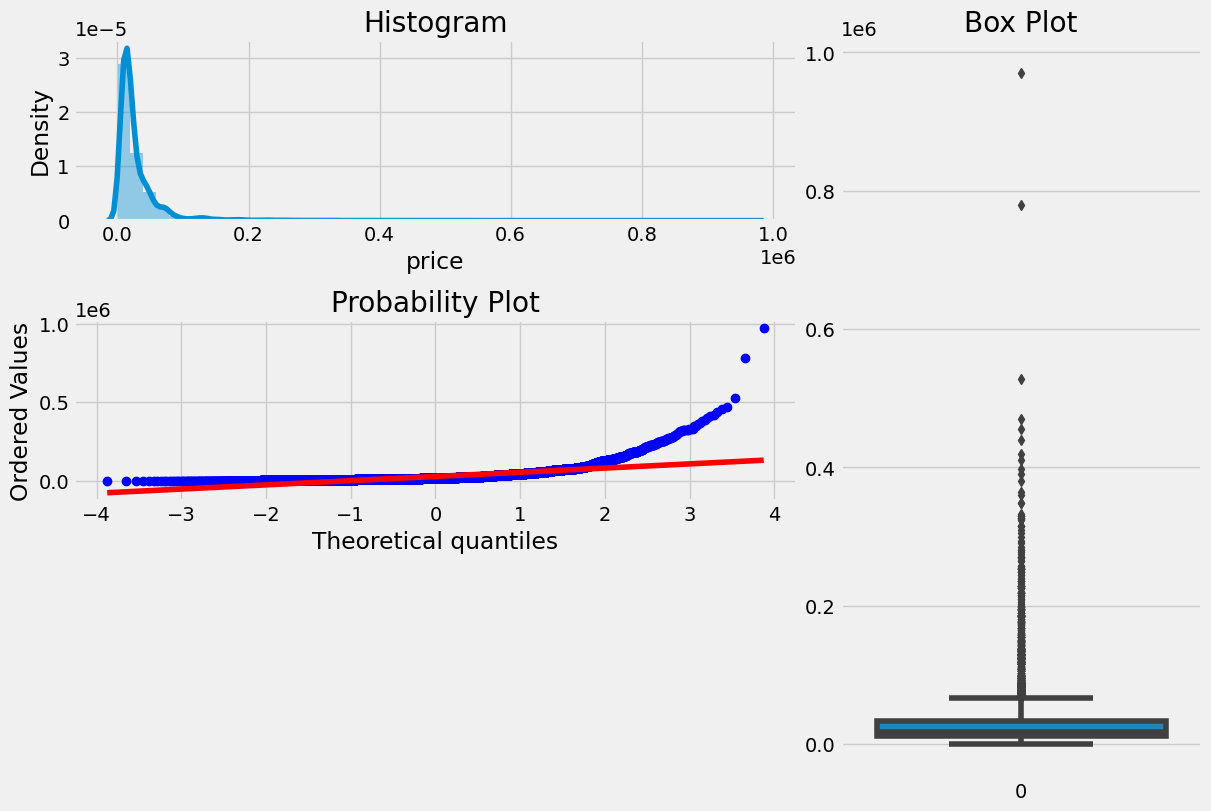

In [24]:
plotting_3_chart(df, 'price')

In [25]:
df['price'].agg(['min', 'mean', 'median','max','std', 'skew']).to_frame().T

min       mean     median         max        std   skew
price 500.0000 28462.8219 18000.0000 970000.0000 35626.0376 6.0948

#### Insights
1. We can clearly observe that our **Car Price Feature** is hiighly right skew and can be problematic for some machine learning algorithms, as they can lead to **biased models** and inaccurate predictions.
2. We can clearly observe there is a significant difference between **mean** & **median values**.
3. We can also that the **skewness of the car price is above 1.5** which mean that the data point are **highly spreed.**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.4"></a>
## <span style="color:#e76f51;">  Feature Distribution of Categorical Features </span>

### 2. Visualizing Total No. of cars sold by different company. 

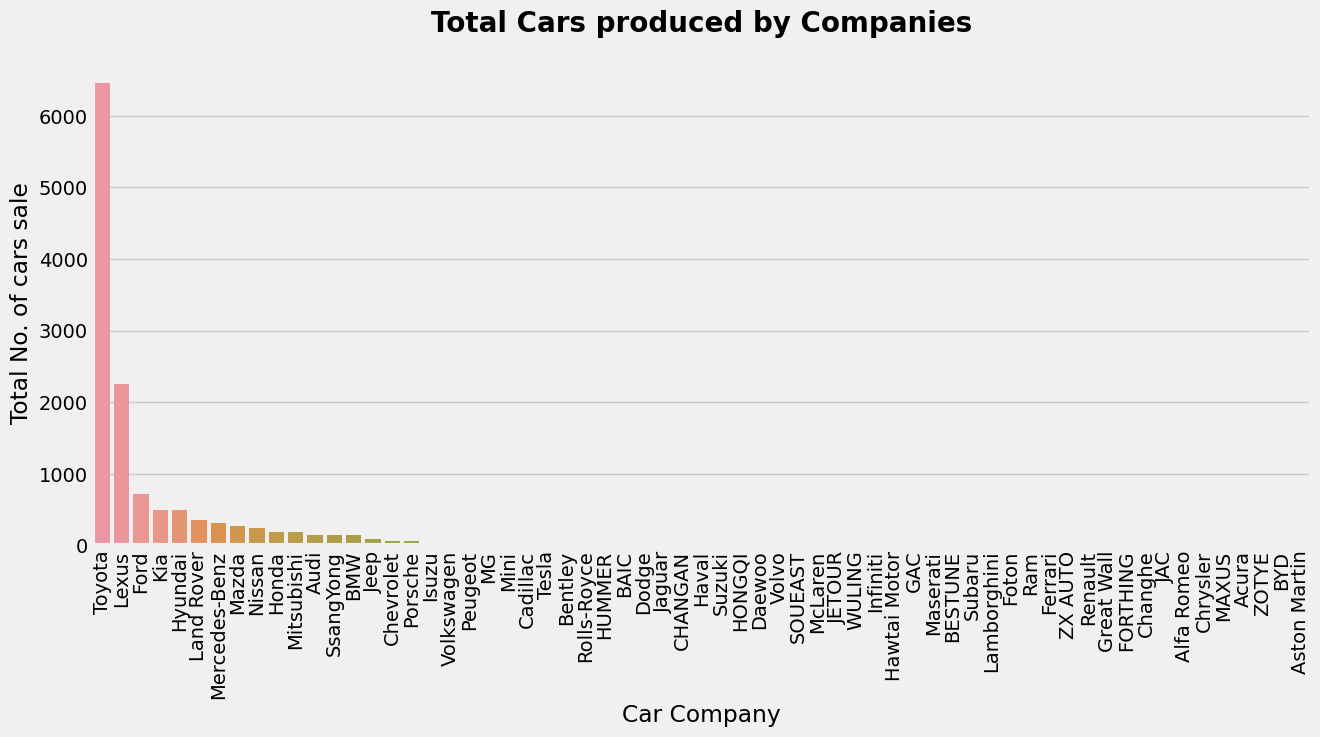

In [26]:
plt.figure(figsize = (14, 6))
counts = df['brand'].value_counts()
sns.barplot(x = counts.index, y = counts.values)
plt.xlabel('Car Company')
plt.ylabel('Total No. of cars sale')
plt.title('Total Cars produced by Companies', pad = 20, fontweight = 'black', fontsize = 20 )
plt.xticks(rotation = 90)
plt.show()

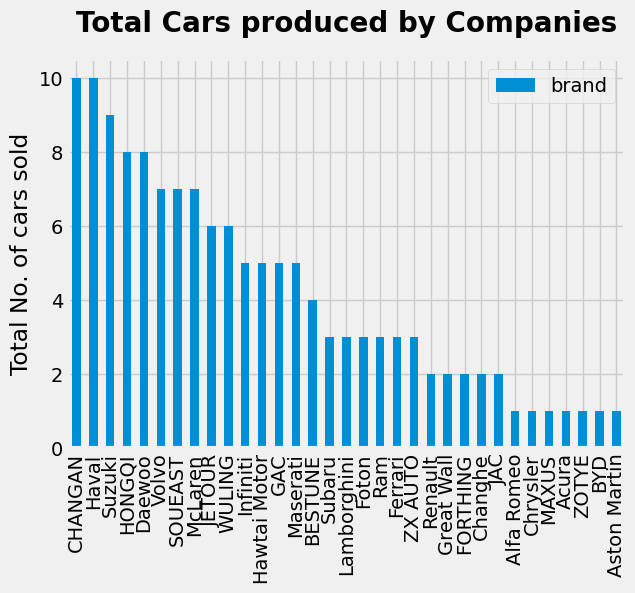

In [27]:
df_brand = pd.DataFrame(df['brand'].value_counts())

df_brand[df_brand['brand']<= 10].plot(kind = 'bar')
plt.ylabel('Total No. of cars sold')
plt.title('Total Cars produced by Companies', pad = 20, fontweight = 'black', fontsize = 20 )
plt.show()

#### Insights
1. **Toyota** company has sale the highest number of cars.
2. So we can say that **Toyota** is kind of customers most favoured campany.
3. **MAXUS, Chrysler, Alfa Romeo, Acura, ZOTYE, BYD, and Aston Martin** are having very low data-points. So we can't make any inference of least salse car companies.

### 3. Visualizing Car Company with Price. 

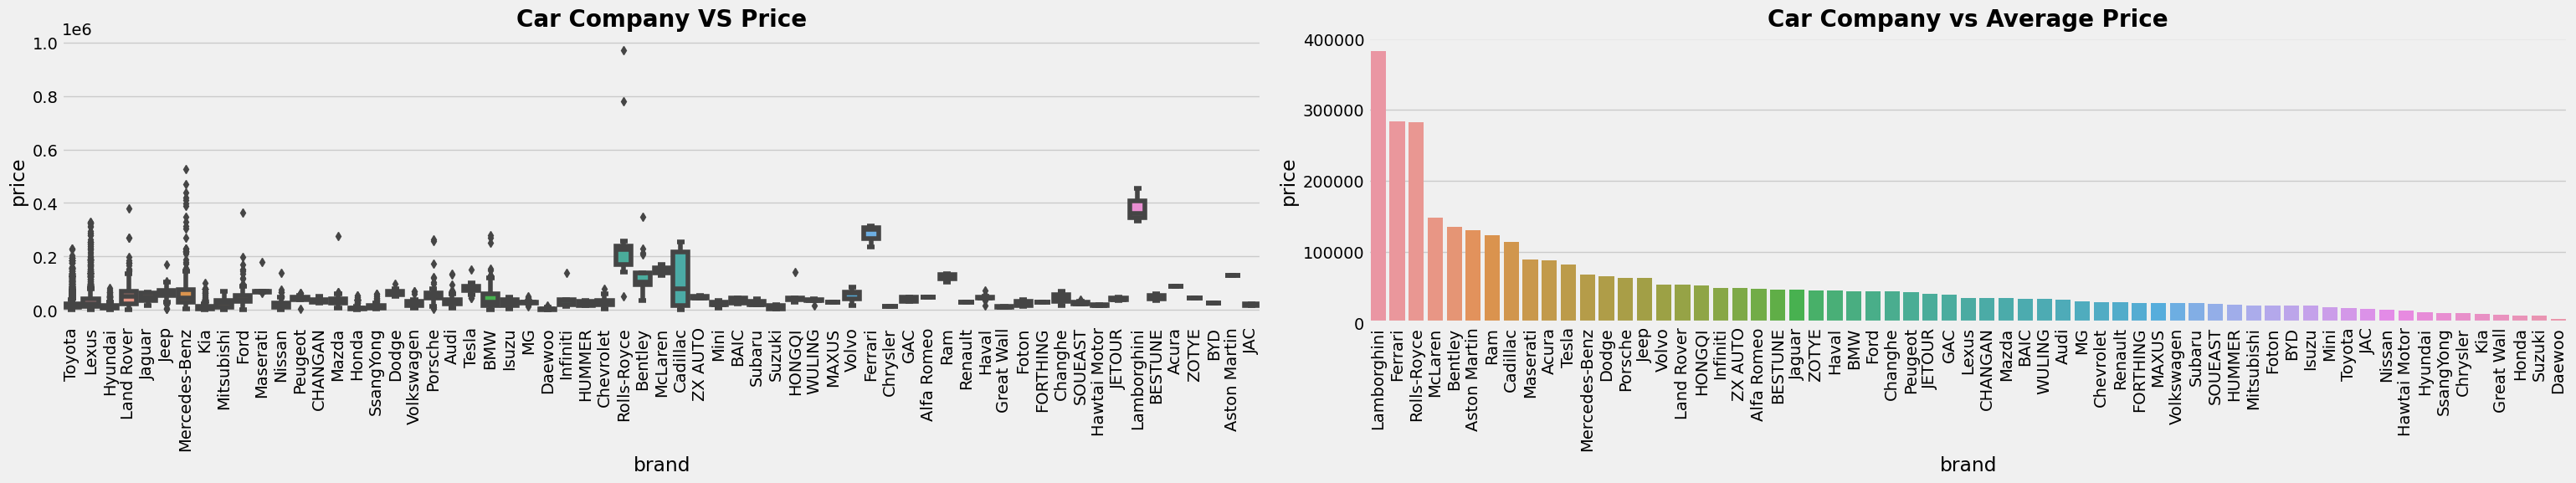

In [28]:
plt.figure(figsize = (int(len(df['brand'].value_counts().values.tolist())/2), 6))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'brand', y = 'price', data = df)
plt.xticks(rotation = 90)
plt.title('Car Company VS Price', pad = 10, fontweight = 'black', fontsize = 20)

plt.subplot(1, 2, 2)
x = pd.DataFrame(df.groupby('brand')['price'].mean().sort_values(ascending = False))
sns.barplot(x = x.index, y = 'price', data = x)
plt.xticks(rotation = 90)
plt.title("Car Company vs Average Price", pad=10, fontweight="black", fontsize=20)
plt.tight_layout()
plt.show()

#### Insights
1. **Lamborghini, Farrari, and Rolls-Royce** seems to have price range cars.
2. Car campanies like **Daewoo** & **Suzuki** are having a little bit in our dataset.
3. So we can't make any inference related to lowest price range car companies.

#### Note
- Sine there are too many categories in car company feature. So we can derive a new feature **Campany Price Range** which will show the price range as **Low Range, Medium Range, Hight Range**.

### 4. Visualizing Car Fuel Type Feature 

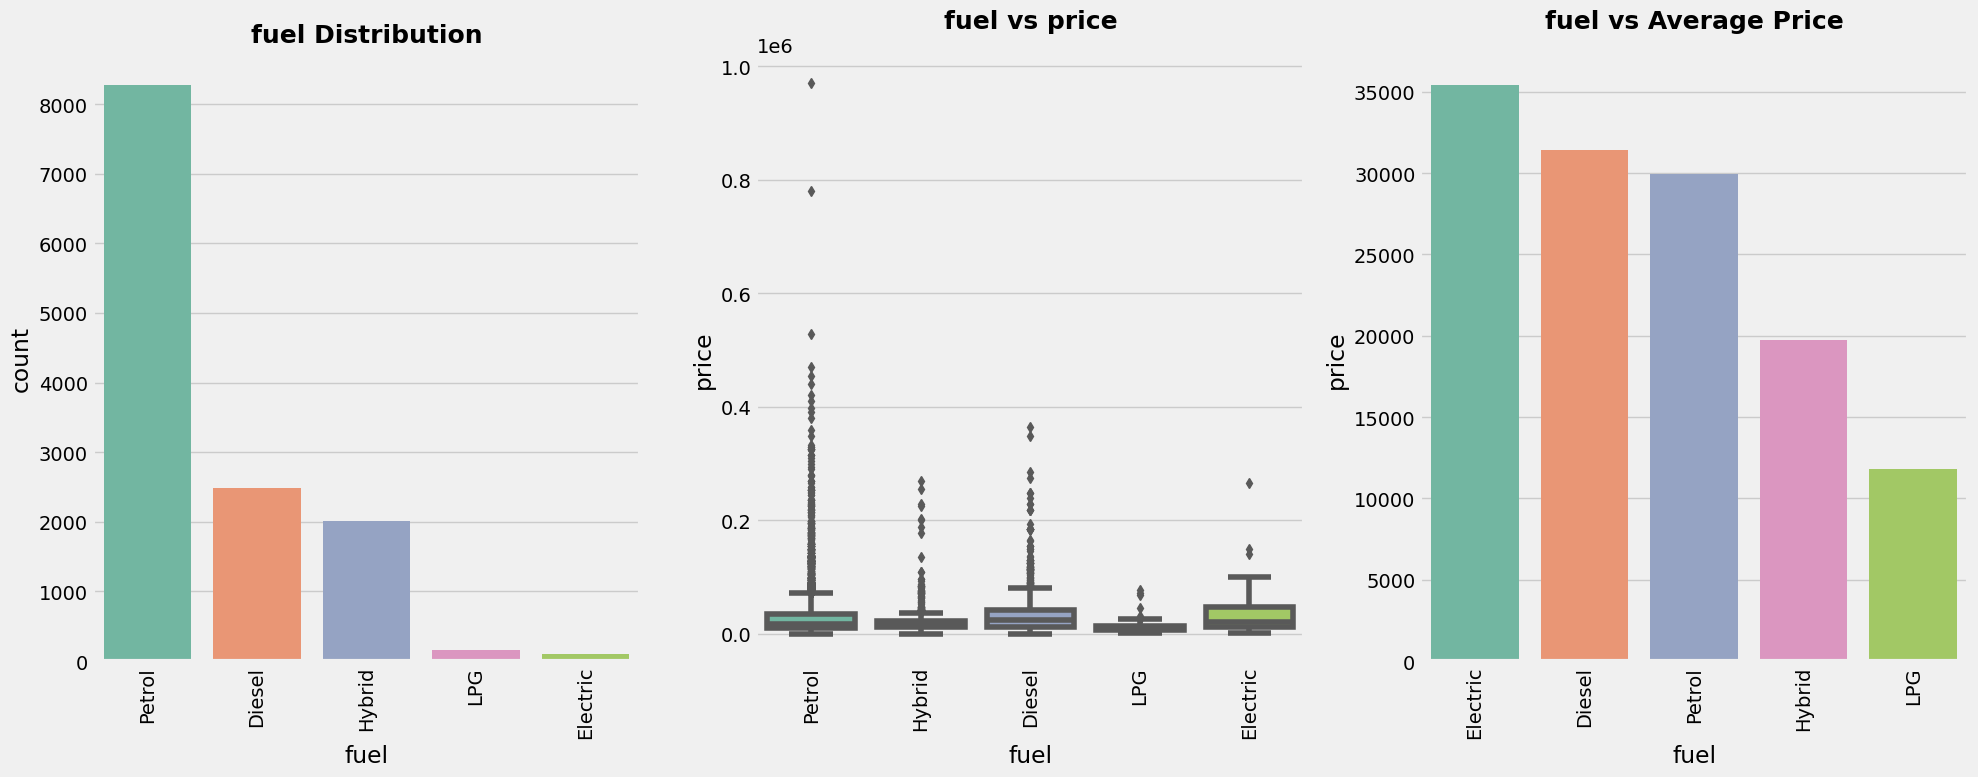

In [29]:
categorical_visualization("fuel", 'price')

#### Insights
1. We can clearly make an insight that **Cars having petrol fuel systme** is mostly sold.
2. From the second plot we can make insight that **Petrol Fuel System cars** are availabe within every **price range**.
3. From the third plot we can make an insight the **Average price of petrol fuel type cars are less than diesl fuel type cars**.

### 5. Visualizing Tax Type 

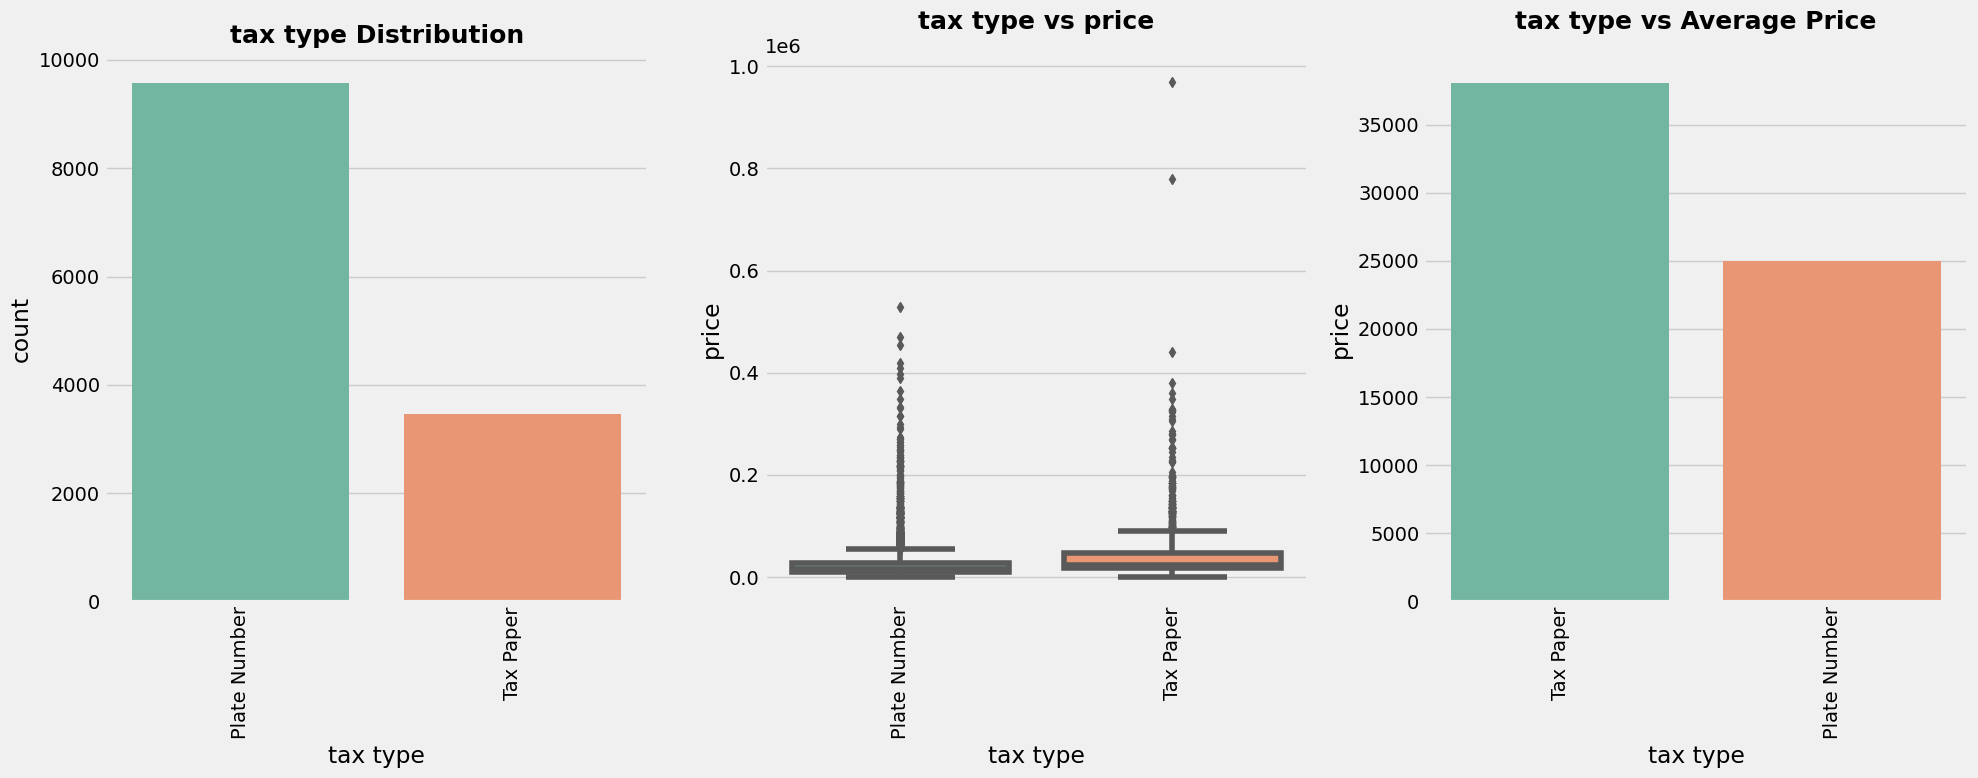

In [30]:
categorical_visualization('tax type', 'price')

#### Observation
1. Cars **Plate Number** are mostly sale when compared with cars **Tax Paper**.
2. Cars **Tax Paper** are more expansive than Cars **Plate Number**.

#### Insights
1. Outliers present in both.

### 6. Visualizing  Conditon Feature

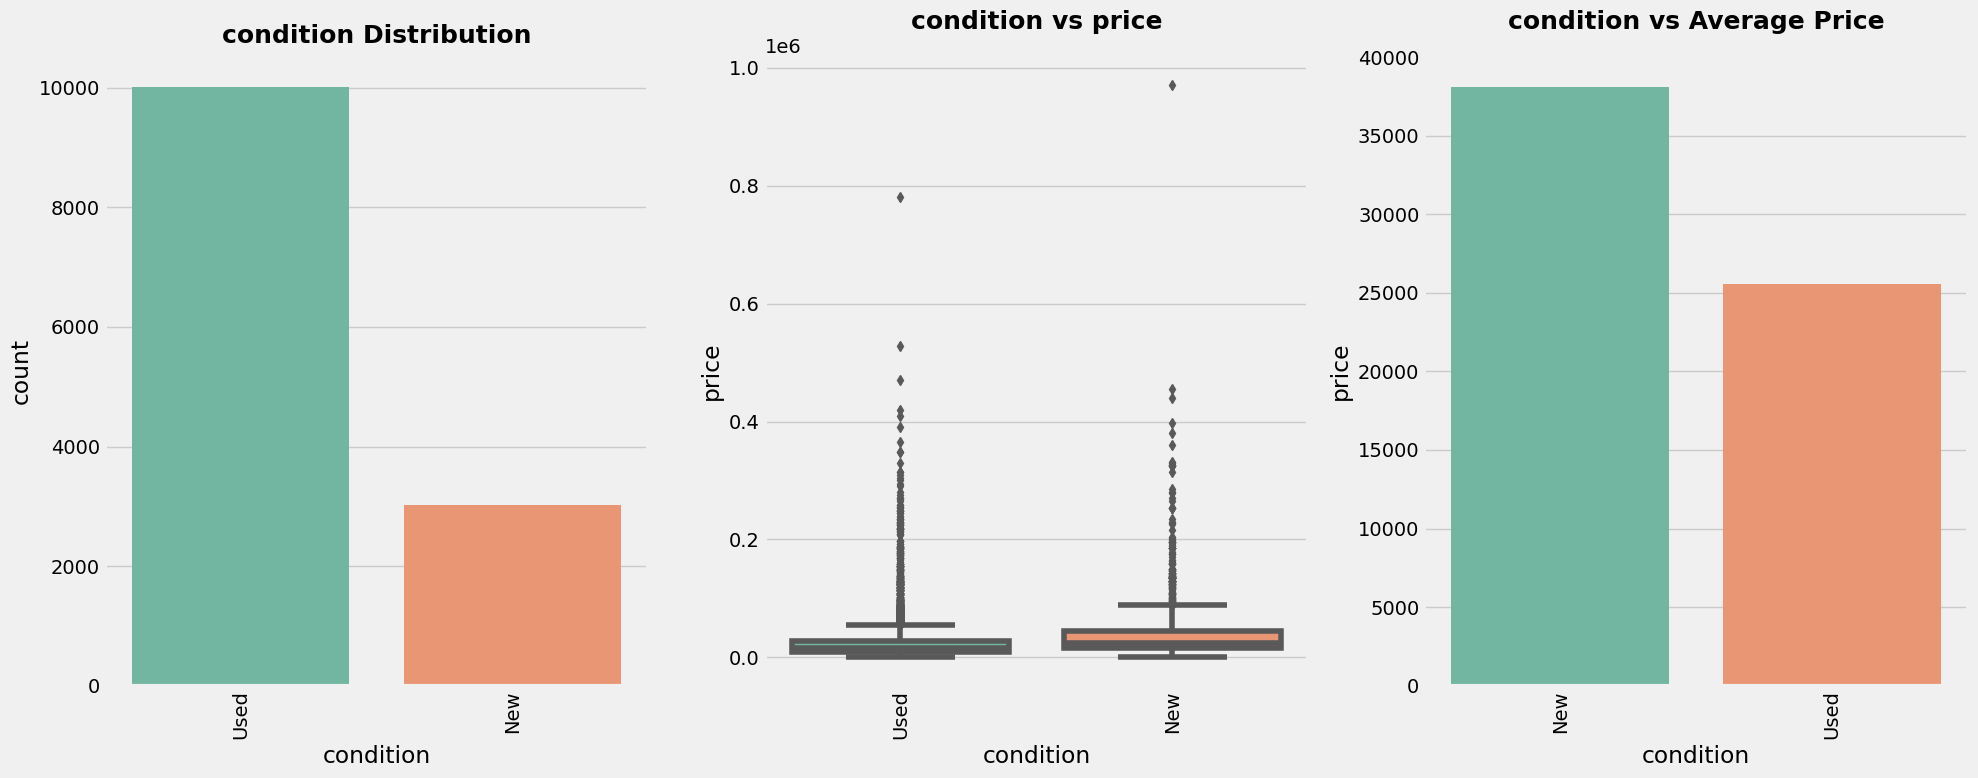

In [31]:
categorical_visualization('condition', 'price')

#### Observation
1. The website has **cars used** more than **cars new**
2. **Cars New** are higher average price than **Car used**

### 7. Visualizing Body Type Feature

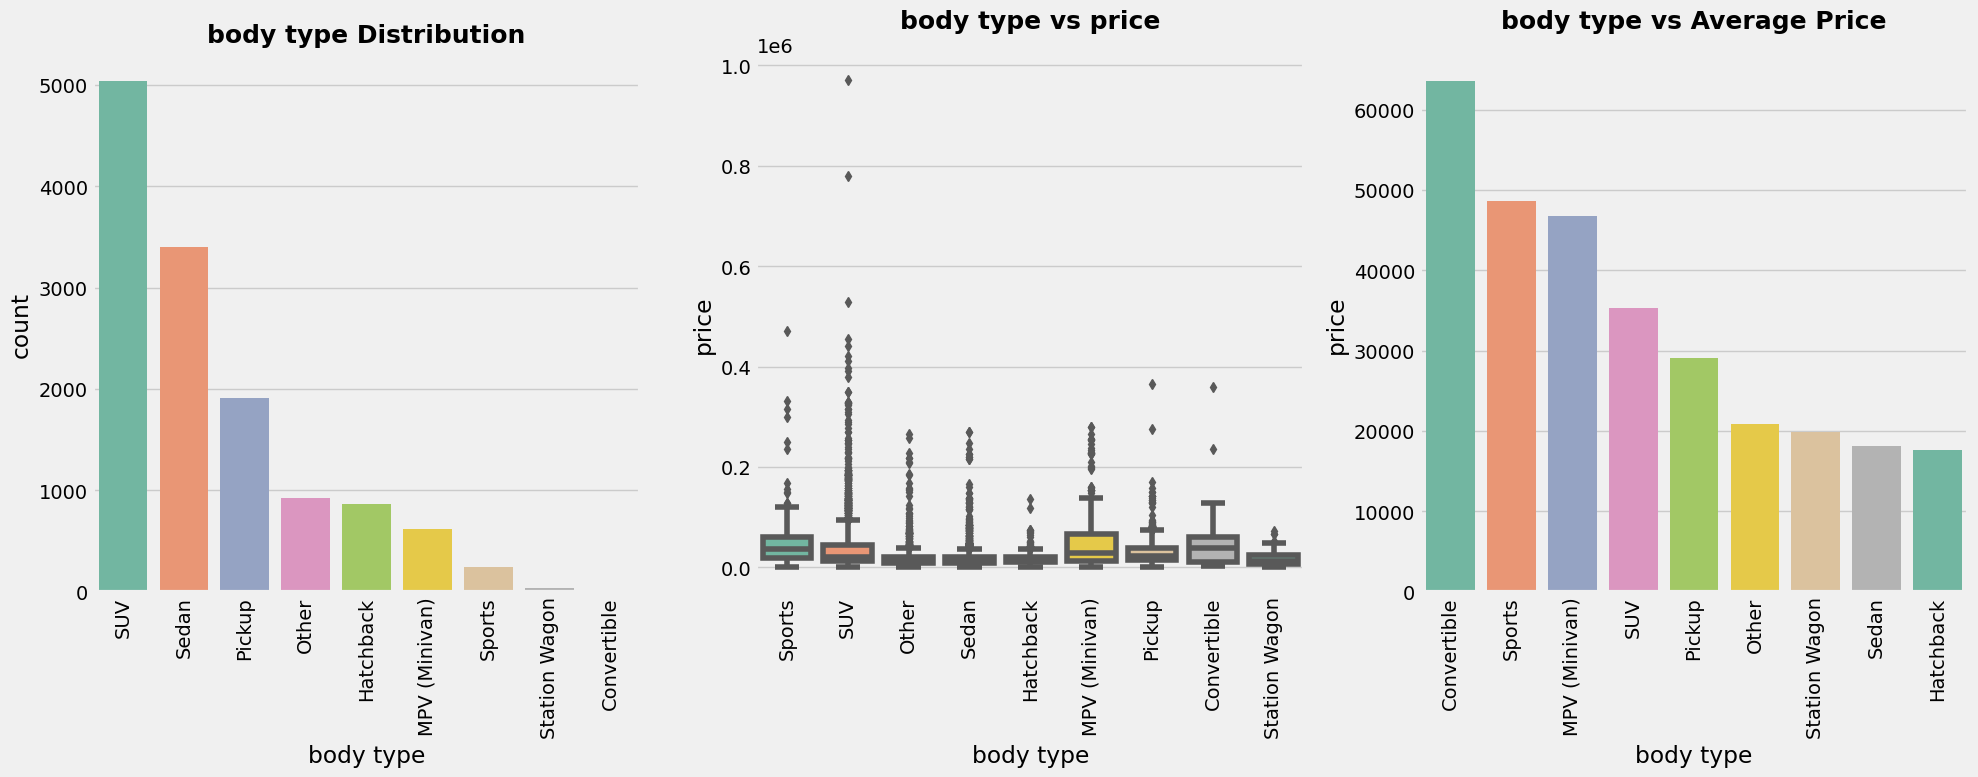

In [32]:
categorical_visualization('body type', 'price')

#### Obseration
1. Cars having **SUV** body-type are mostly salse followed by **Sedan**.
2. Cars having **converitble** or **hardtop** body-type are less salse.
3. Cars having **Converitble** body-type is the mostly expensive cars foolowed by **sport**.

#### Insights
1. **Convertible** & **Sport** body-type are less salse because they are very expensive cars. So most of the customers couldn't prefer it.
2. Car having **SUV** body-type is the fourth most expensive car. But still its having the most number of cars sales. So we can say customer prefer **medium price range cars**.

### 8. Visualizing Transmission Feature 

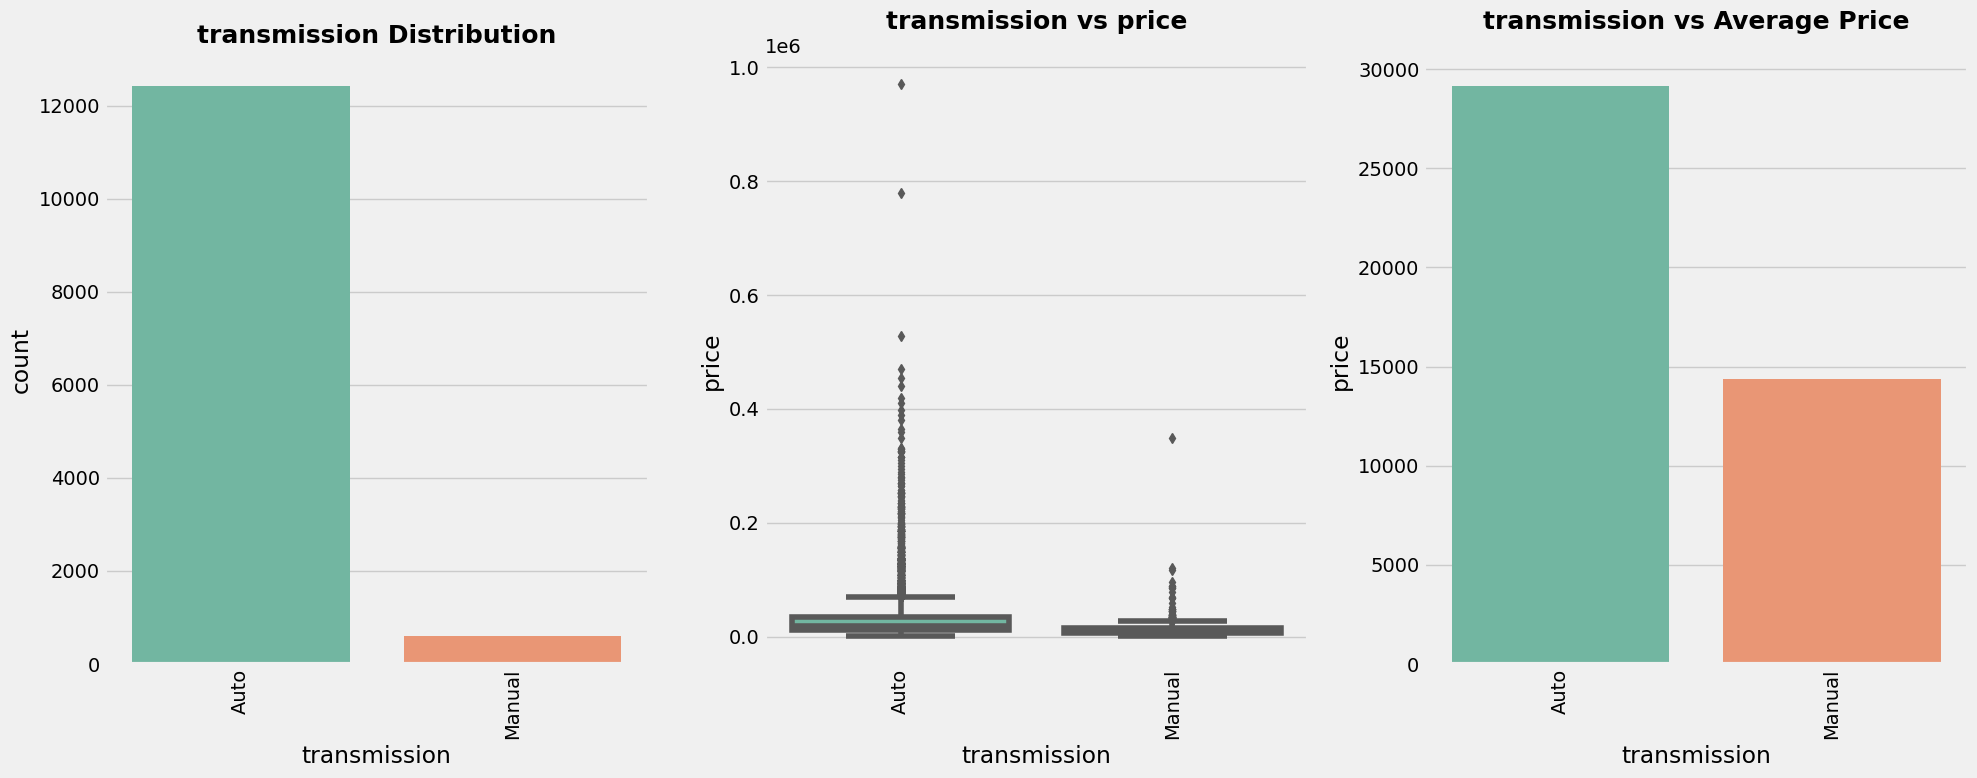

In [33]:
categorical_visualization('transmission', 'price')

### 9. Visualizing Color Feature 

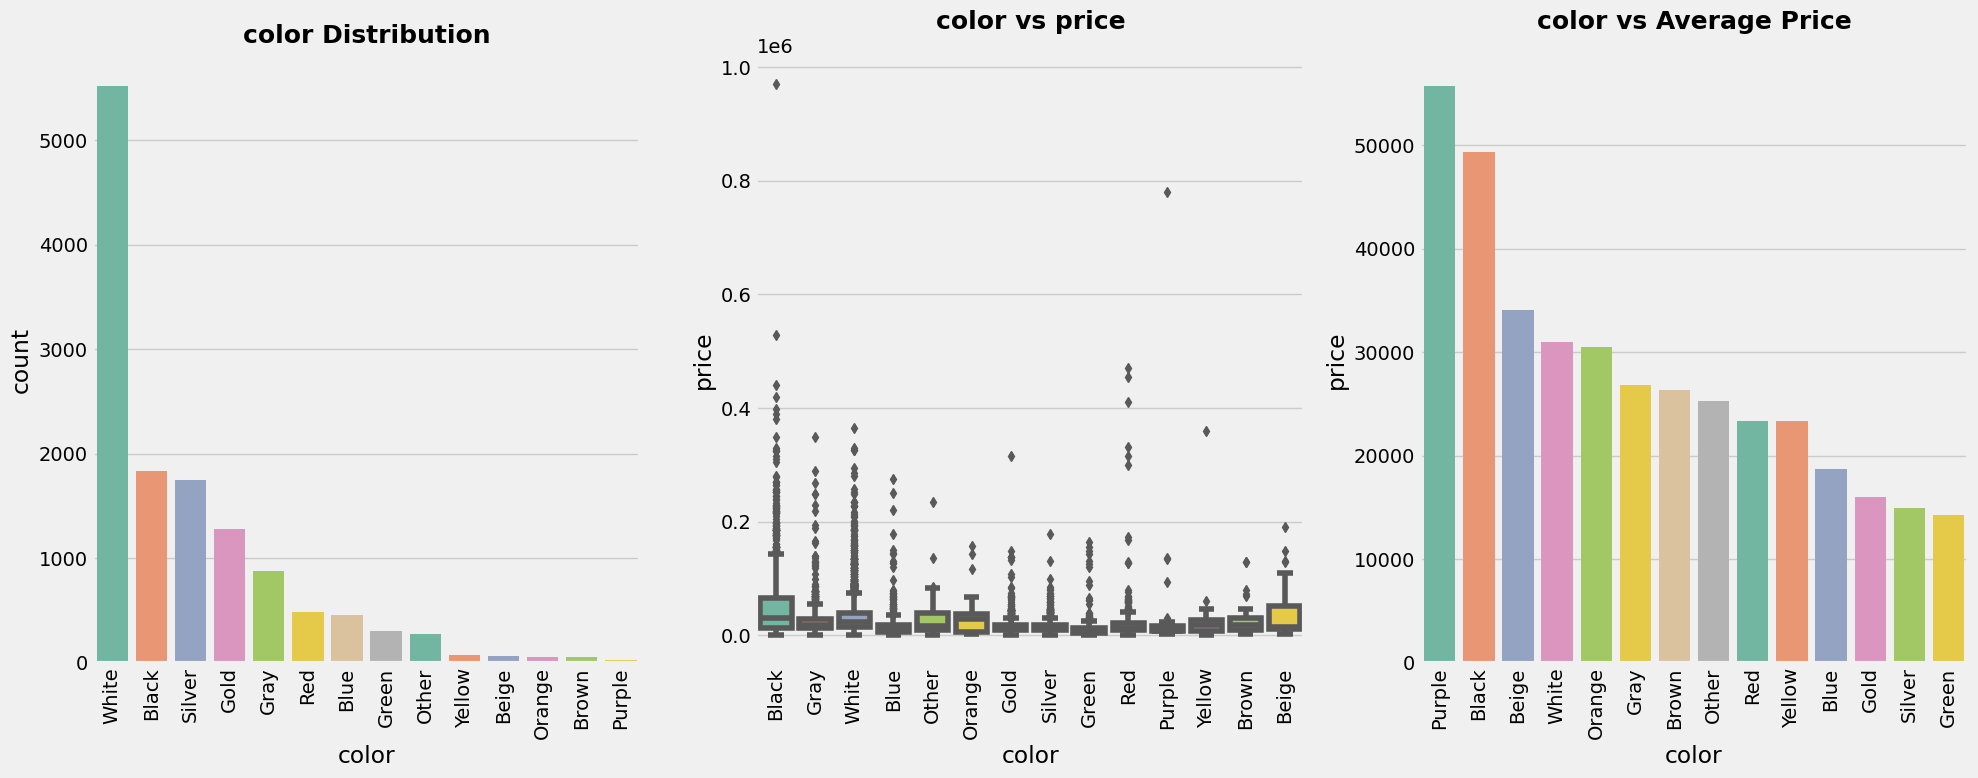

In [34]:
categorical_visualization('color', 'price')

### 10. Visualizion Car Models Features 

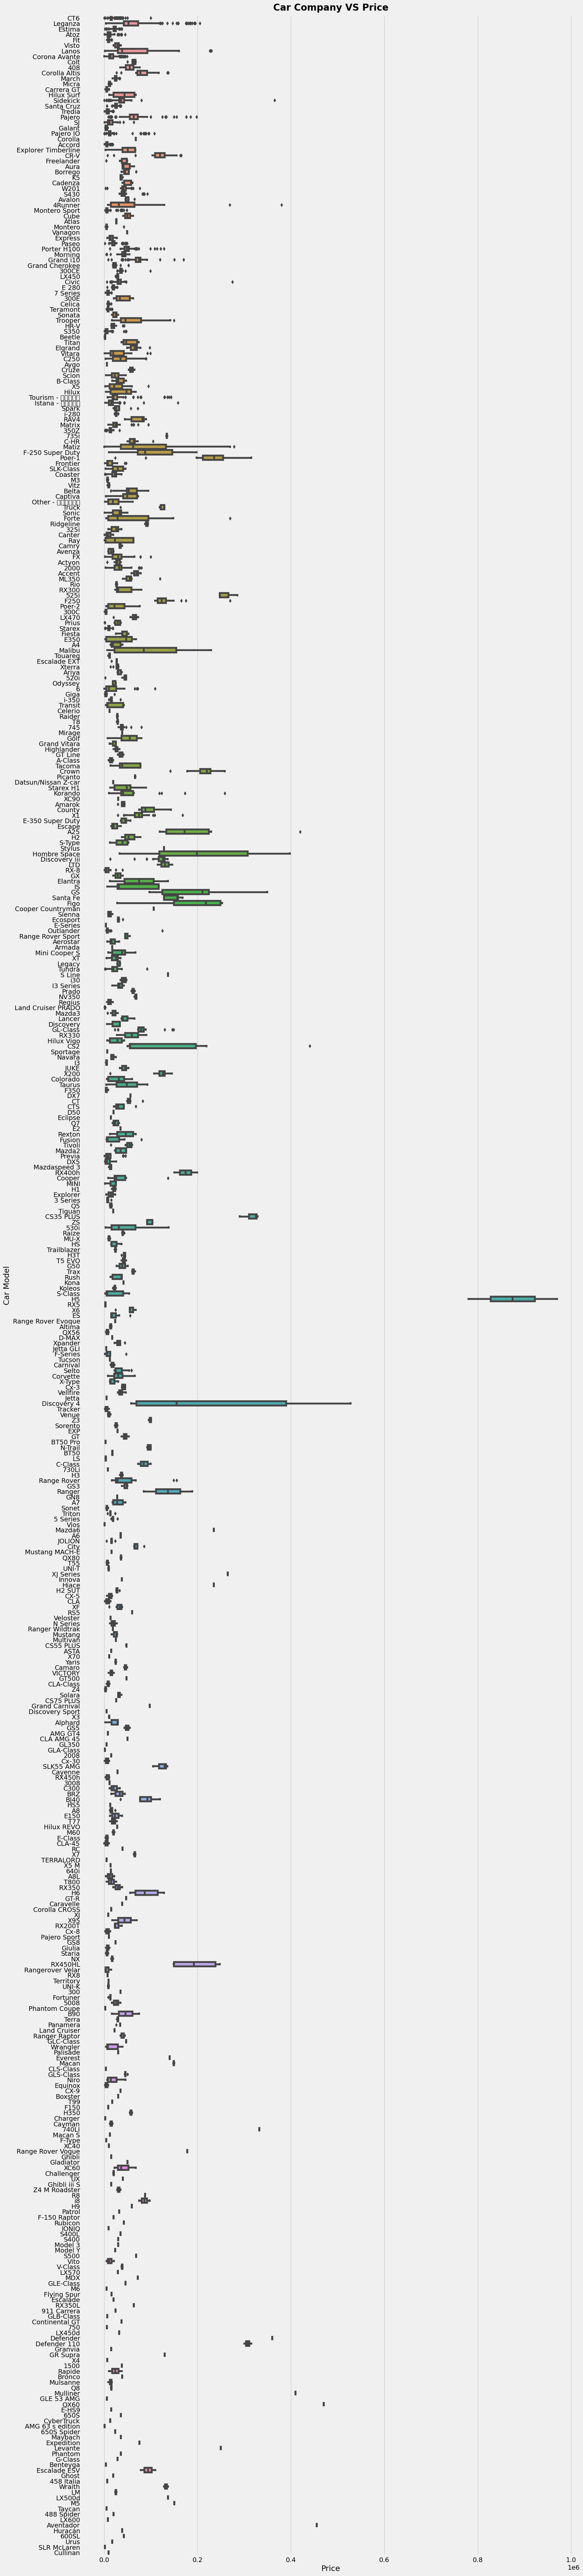

In [35]:
# Set up the plot
fig, ax = plt.subplots(figsize=(20, 90))

# Create a horizontal boxplot
sns.boxplot(x='price', y='model', data=df, orient='h', ax=ax)

# Sort the categories by median price
medians = df.groupby(['model'])['price'].median().sort_values()
category_order = medians.index.tolist()
ax.set_yticklabels(category_order)

# Add labels and adjust margins
ax.set_xlabel('Price')
ax.set_ylabel('Car Model')
ax.set_title('Car Company VS Price', pad=10, fontweight='black', fontsize=20)
plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.1)

plt.show()

Text(0.5, 1.0, 'Car Company VS Price')

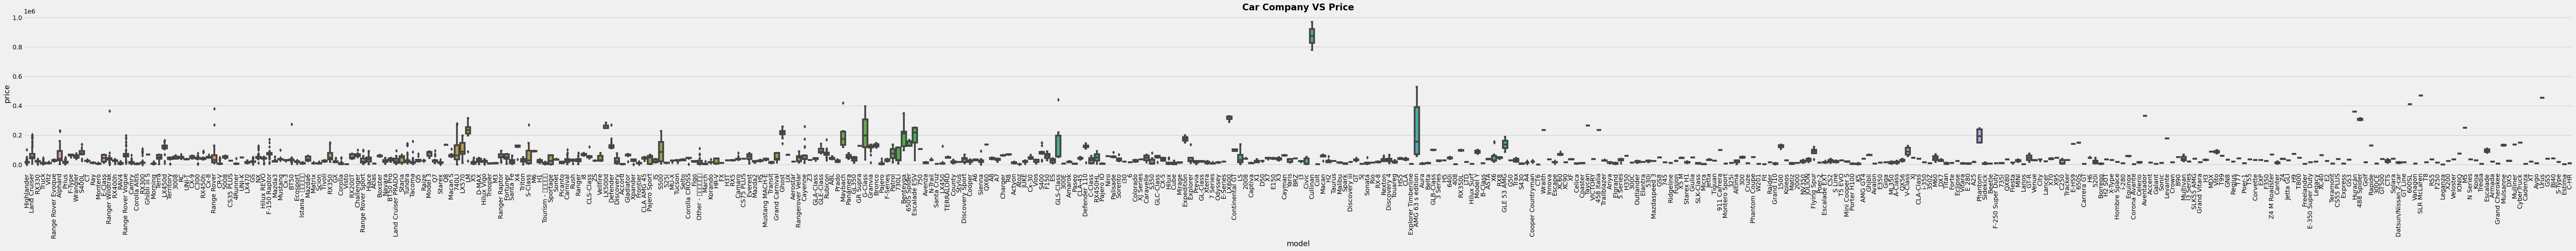

In [36]:
plt.figure(figsize = (200, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'model', y = 'price', data = df, orient= 'v')
plt.xticks(rotation = 90)
plt.title('Car Company VS Price', pad = 10, fontweight = 'black', fontsize = 20)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.2"></a>
## <span style="color:#e76f51;">Continuos and Categorical Data Distribution </span>

### 11. Visualizing Car Location Features 

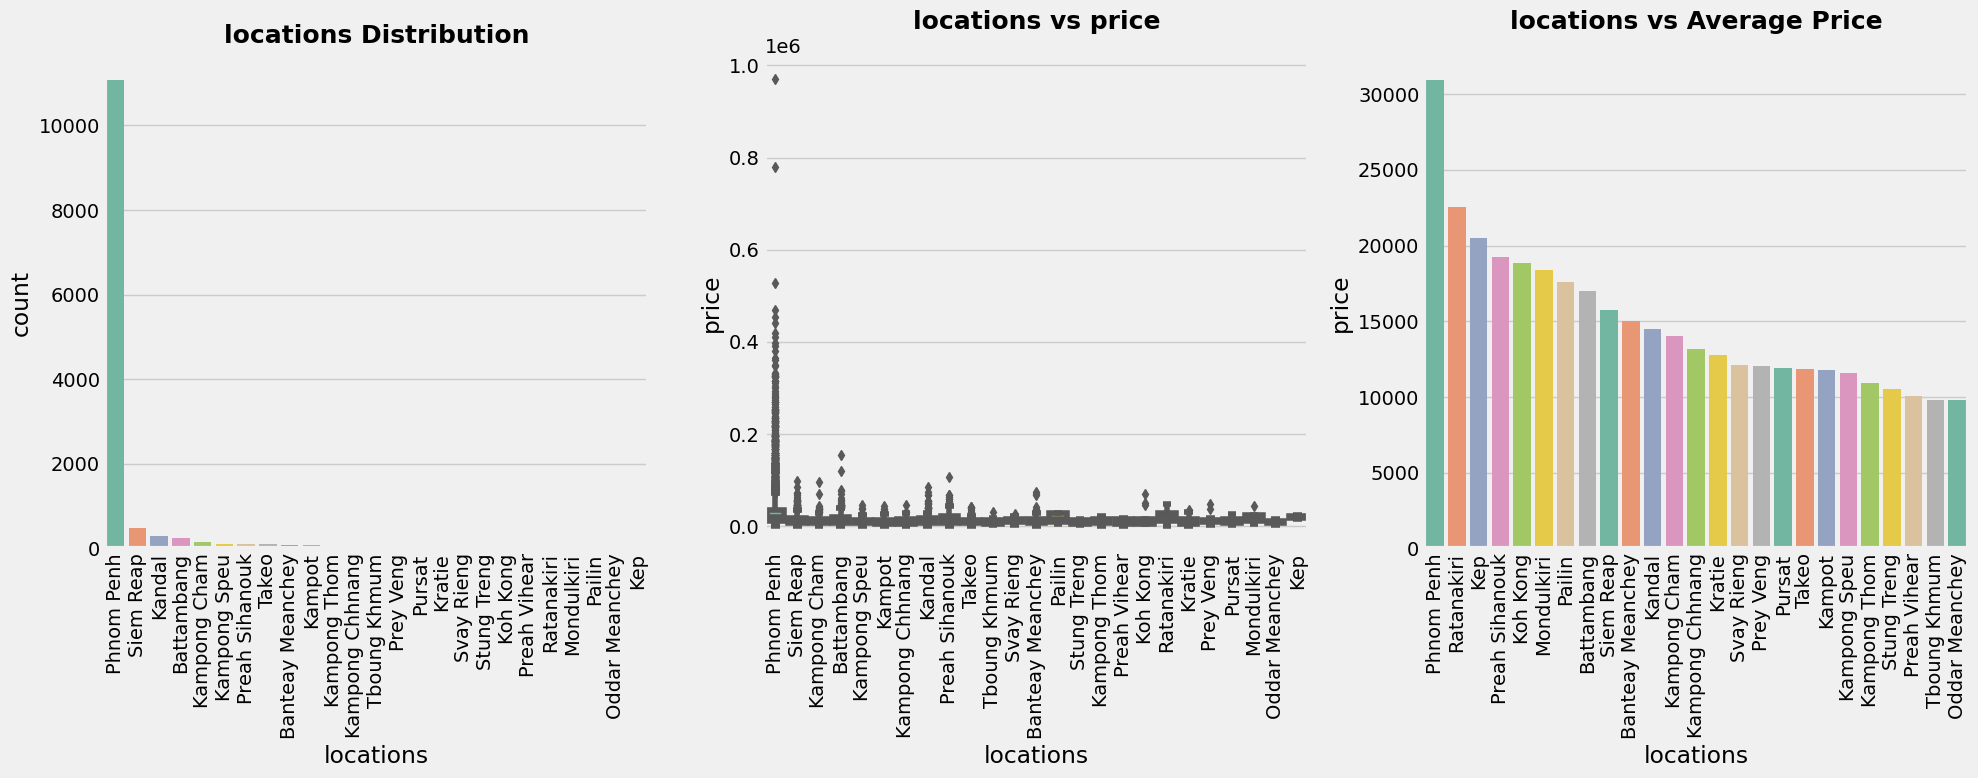

In [37]:
categorical_visualization('locations', 'price')

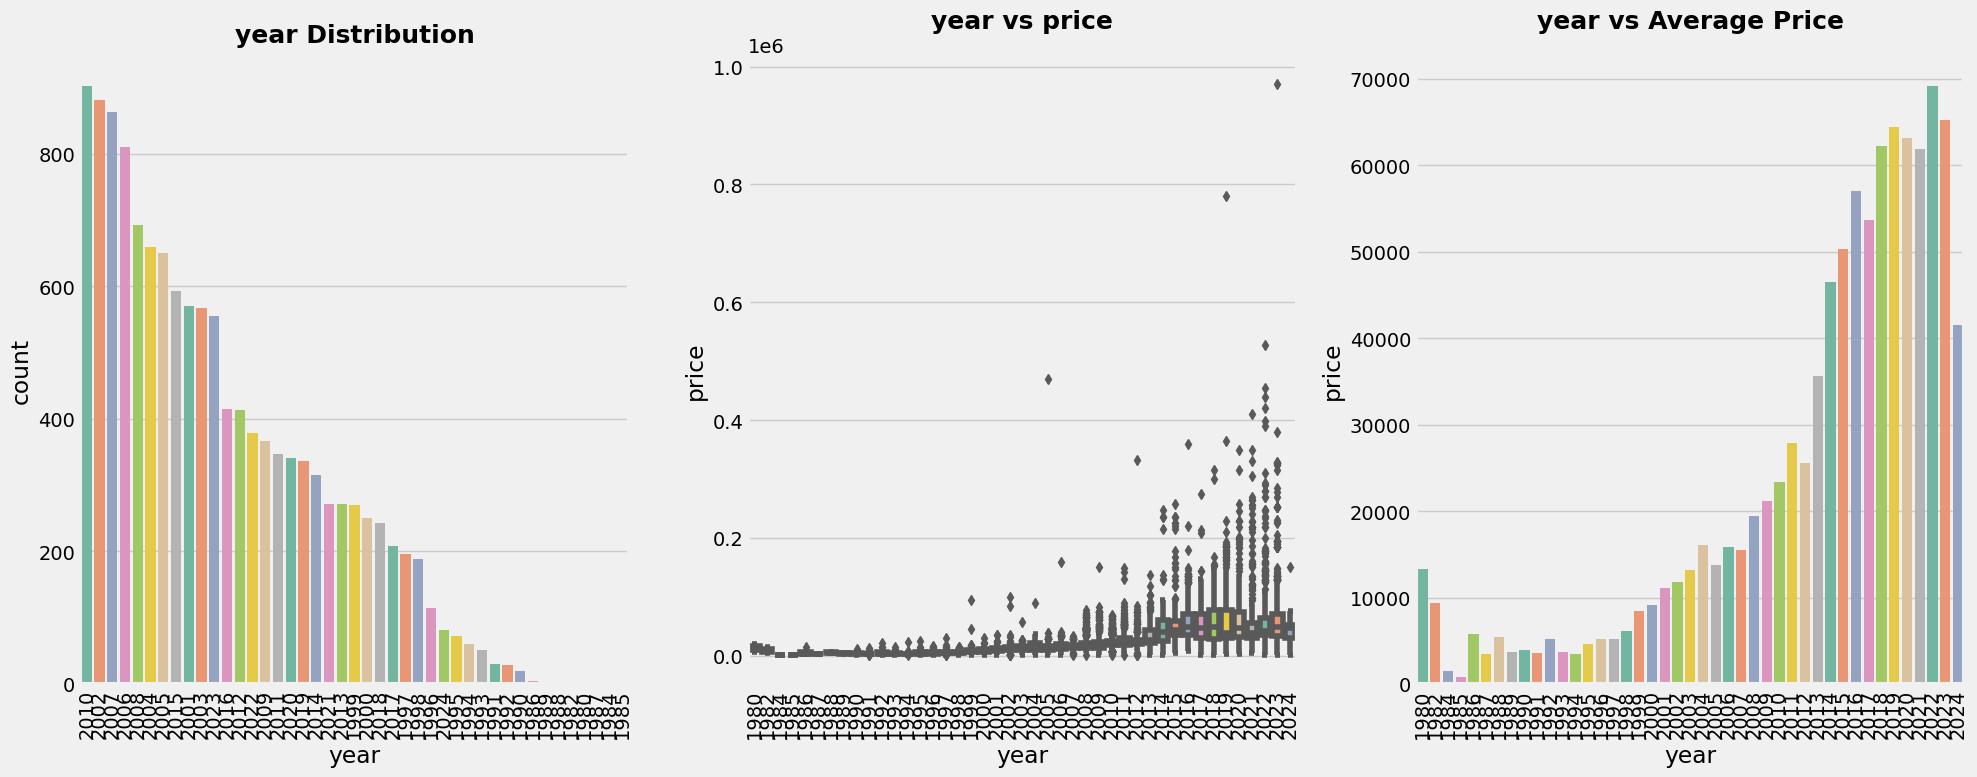

In [38]:
categorical_visualization('year', 'price')

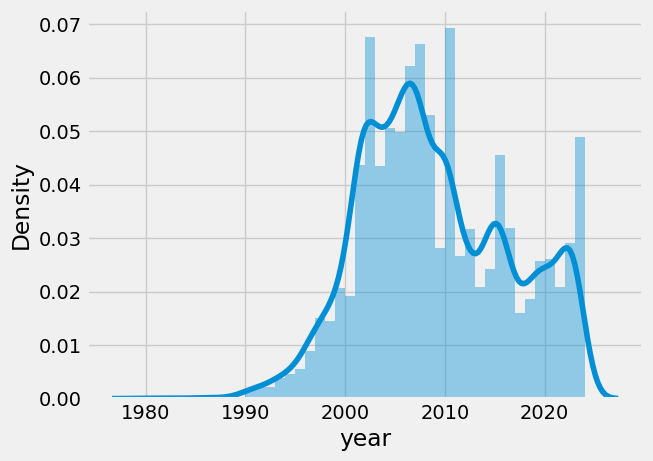

In [39]:
sns.distplot(df['year'])
plt.show()

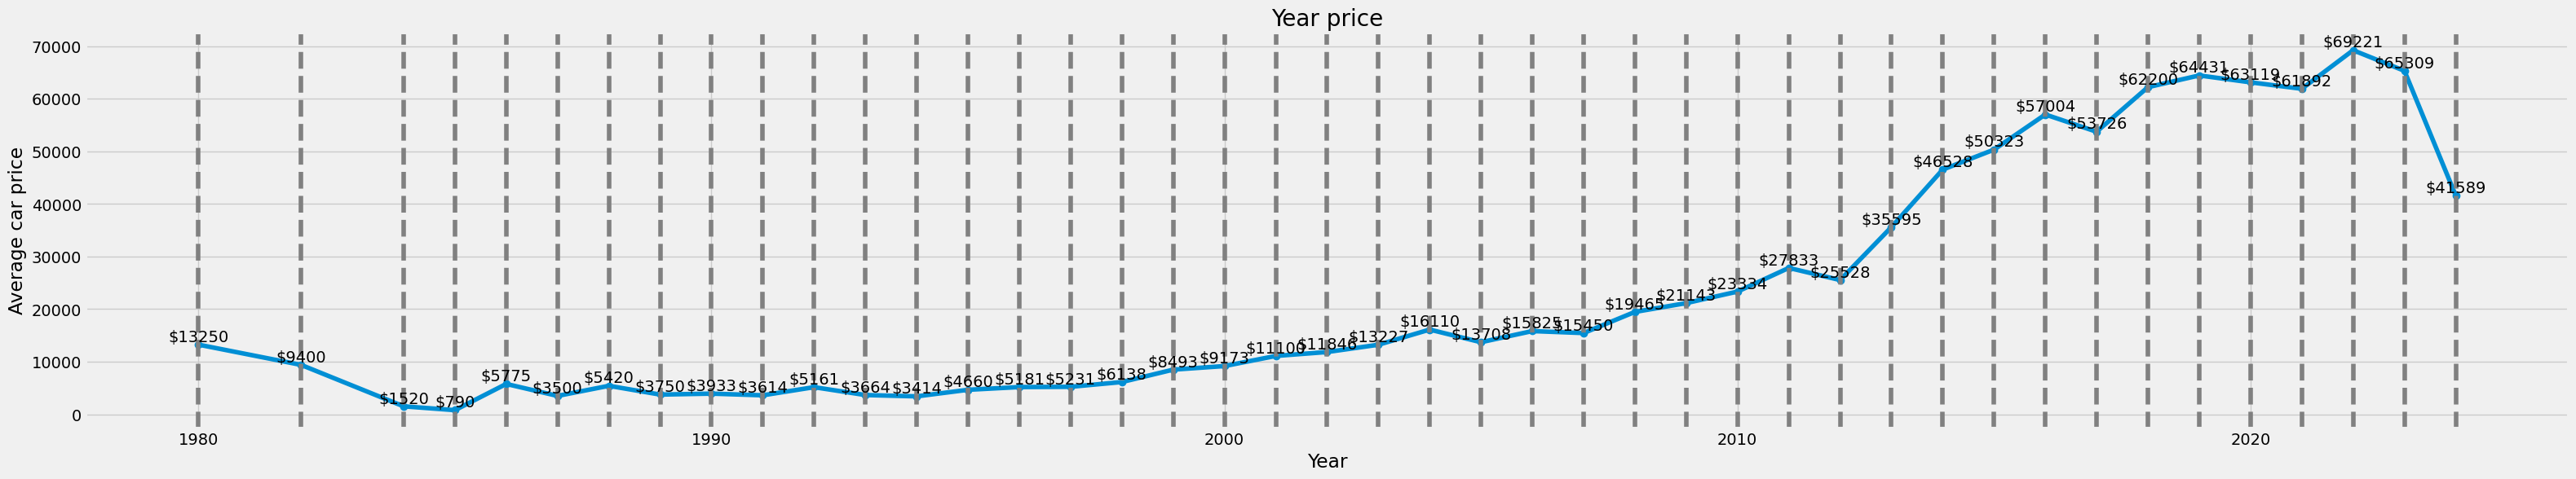

In [40]:
plt.figure(figsize=(35, 6))
mean_prices = df.groupby('year')['price'].mean()

# Create a line plot with markers
mean_prices.plot(marker='o')

# Add labels to the x-axis and y-axis
plt.xlabel('Year')
plt.ylabel('Average car price')
plt.title('Year price')

# Add text labels to each data point
for year, price in mean_prices.iteritems():
    plt.text(year, price, f"${price:.0f}", ha='center', va='bottom')
    plt.axvline(x=year, color='gray', linestyle='--')

plt.show()

#### Observation
 * The average prices seem to have increase from year 2012 to 2022

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 10. List of all the useful Feature

**List of all the useful Categorical Features.**
1. Location
2. Car Makes
3. Car Model
4. Tax Type
5. Condition
6. Body Type
7. Fuel
8. Transmission
9. Color

**List of all the useful Numerical Features.**
* Year
* Price

<a id="4.5"></a>
## <span style="color:#e76f51;">  Correlation matrix </span>

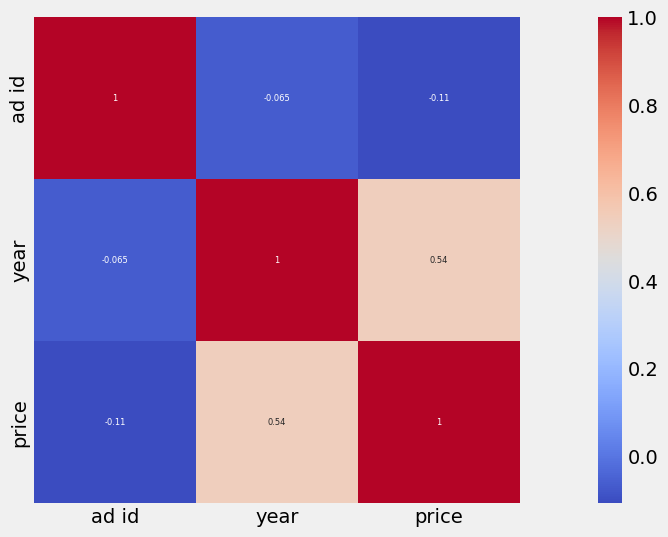

In [41]:
# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(18,6))

sns.heatmap(cars.corr(), annot= True, square=True, ax = ax, cbar= True, annot_kws={"fontsize": 6}, cmap='coolwarm')
plt.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id = '4.6'><span>Feature Engineering</span></a>
</p>
</div>

### 1. Deriving New Features From "Cars Makes" Feature. 

* As we made an insight above that we can split the car company name into different price ranges.Like **Low Range, Medium Range, High Range** cars.

In [42]:
data_comp_avg_price = df[['brand','price']].groupby('brand', as_index = False).mean().rename(columns={'price':'brand_avg_price'})

df = df.merge(data_comp_avg_price, on= 'brand')

data_comp_avg_price.describe()

brand_avg_price
count          63.0000
mean        57110.1663
std         67049.0065
min          4761.2500
25%         24600.9086
50%         35267.7476
75%         53636.8752
max        382333.3333

In [43]:
df['brand_category'] = df['brand_avg_price'].apply(lambda x : "Budget" if x < 30000 
                                                     else ("Mid_Range" if 30000 <= x < 50000
                                                           else "Luxury"))

**Note**
* In above output we fetched the **average price of each individual car companies**
* Now we have to add this average values a new column in our datset.

---

In [44]:
car_make_Budget = pd.DataFrame(df[df['brand_category'] == 'Budget']['brand'].value_counts()).index.to_list()

car_model_Budget = df[df['brand'].apply(lambda x: x in car_make_Budget)]['model'].value_counts().index.to_list()

df_Budget = pd.DataFrame(df[df['brand'].apply(lambda x: x in car_make_Budget)].groupby(['brand'])['model'].value_counts()).rename(columns={'model': 'Count Number'}).reset_index(level =1)

insight_range_price(car_make_Budget, car_model_Budget, df_Budget, 'Budget')


The total number of Car brands and Car models in range of Budget prices 217
The total number of Car brands in range of Budget prices 26
The total number of Car models in range of Budget prices 210


---

In [45]:
car_make_Medium = pd.DataFrame(df[df['brand_category'] == 'Mid_Range']['brand'].value_counts()).index.to_list()

car_model_Medium = df[df['brand'].apply(lambda x: x in car_make_Medium)]['model'].value_counts().index.to_list()

df_model_Medium = pd.DataFrame(df[df['brand'].apply(lambda x: x in car_make_Medium)].groupby(['brand'])['model'].value_counts()).rename(columns={'model': 'Count Number'}).reset_index(level =1)


insight_range_price(car_make_Medium, car_model_Medium, df_model_Medium, 'Medium')


The total number of Car brands and Car models in range of Medium prices 154
The total number of Car brands in range of Medium prices 19
The total number of Car models in range of Medium prices 153


---

In [46]:
car_make_Highend= pd.DataFrame(df[df['brand_category'] == 'Luxury']['brand'].value_counts()).index.to_list()

car_model_Highend = df[df['brand'].apply(lambda x: x in car_make_Highend)]['model'].value_counts().index.to_list()

df_Highend = pd.DataFrame(df[df['brand'].apply(lambda x: x in car_make_Highend)].groupby(['brand'])['model'].value_counts()).rename(columns={'model': 'Count Number'}).reset_index(level =1)

insight_range_price(car_make_Highend, car_model_Highend, df_Highend, 'Luxury')


The total number of Car brands and Car models in range of Luxury prices 107
The total number of Car brands in range of Luxury prices 18
The total number of Car models in range of Luxury prices 107


---

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 5. Detect unkown values 

In [47]:
index = check_column_value(df, ['Other', 'Other - ផ្សេងៗ', 2024])

df.drop(index, axis= 0, inplace=True)

df.shape

Columns that contain the ['Other', 'Other - ផ្សេងៗ', 2024]:

model         [0, 53, 0]
year          [0, 0, 82]
body type    [921, 0, 0]
color        [274, 0, 0]
dtype: object


(11791, 13)

### 2. Create new feature to correct year 

In [48]:
from datetime import datetime

# Get the current year
current_year = datetime.today().year

life_span = df['year'].apply(lambda x: current_year-x).values.tolist()

df['lifespan'] = life_span

df.drop(columns=['year'], inplace=True)

df['lifespan'] = df['lifespan'].astype(int)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id = '5'><span>Data Preprocessiong</span></a>
</p>
</div>

### 1. Creating new DataFrame with all the useful Features.

In [49]:
new_data = df.drop(columns=['brand_avg_price'], axis = 1)

### 2. <a id = '5.1'>Handling Outliers</a>

The IQR is 22500.0
The lower bound value is -22250.0
The upper bound value is 67750.0
Total number of outliers are 966


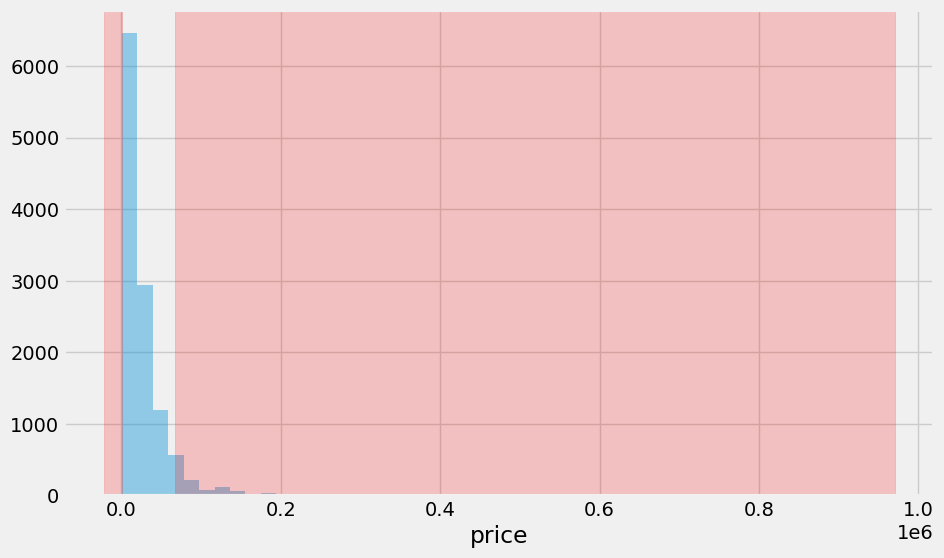

In [50]:
visulize_outlier(new_data, 'price')

In [51]:
outlier_index = outlier_detection(new_data['price']).index
df_outlier = new_data.loc[new_data.index.isin(outlier_index)]

new_data.drop(outlier_index, axis= 0, inplace = True)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="5.2"></a>
## <span style="color:#e76f51;">Encoding </span>

### 3. Dummy Encoding 

In [52]:
data = new_data.drop(columns=['brand', 'model'], axis = 'columns')

In [53]:
cat_features = data.select_dtypes(include='O').columns.tolist()
cat_features

['locations',
 'tax type',
 'condition',
 'body type',
 'fuel',
 'transmission',
 'color',
 'brand_category']

In [54]:
dummy_data = pd.get_dummies(columns=cat_features, data = data)

In [55]:
dummy_data = scaler_df(dummy_data, ['price'], MinMaxScaler())

### 4. Target Encoding 

In [56]:
data = new_data.drop(columns=['brand_category'], axis = 1)
data = scaler_df(data, ['price'], MinMaxScaler())
X_train, X_test, y_train, y_test = target_encodnig(data, 'O', 'price')
X_train, X_test = scaler_df(X_train, X_train.columns, MinMaxScaler()), scaler_df(X_test, X_train.columns, MinMaxScaler())

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 5. Splitting Data for Model Traning & Testing.

In [57]:
# X = dummy_data.drop('price', axis = 1)
# y = dummy_data.price

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id = '6'><span>Model Building</span></a>
</p>
</div>

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b><a id = '6.1'>1. Linear-Regression </a></b> Model</h2>

In [58]:
from sklearn.linear_model import LinearRegression
model_prediction(X_train, X_test, y_train, y_test, LinearRegression(), 'Linear Regression Model', record=True)

r2_Score of LinearRegression() model on Training Data is: 74.43979769326481
r2_Score of LinearRegression() model on Testing Data is: 72.62316972443192
MSE of LinearRegression() model on Testing Data is: 0.01212428889437597


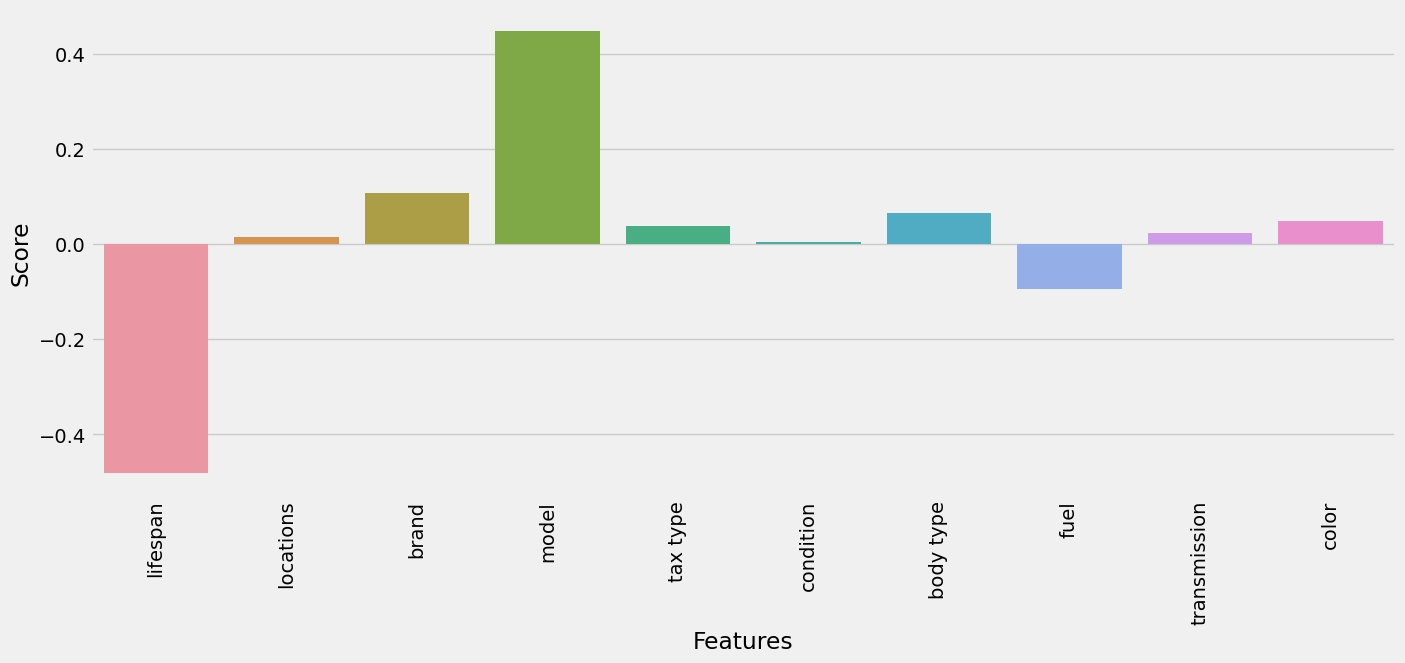

In [59]:
visualize_linear_features_importance(X_train, y_train, LinearRegression())

Normal test: NormaltestResult(statistic=450.59342969595116, pvalue=1.4284990325518697e-98)


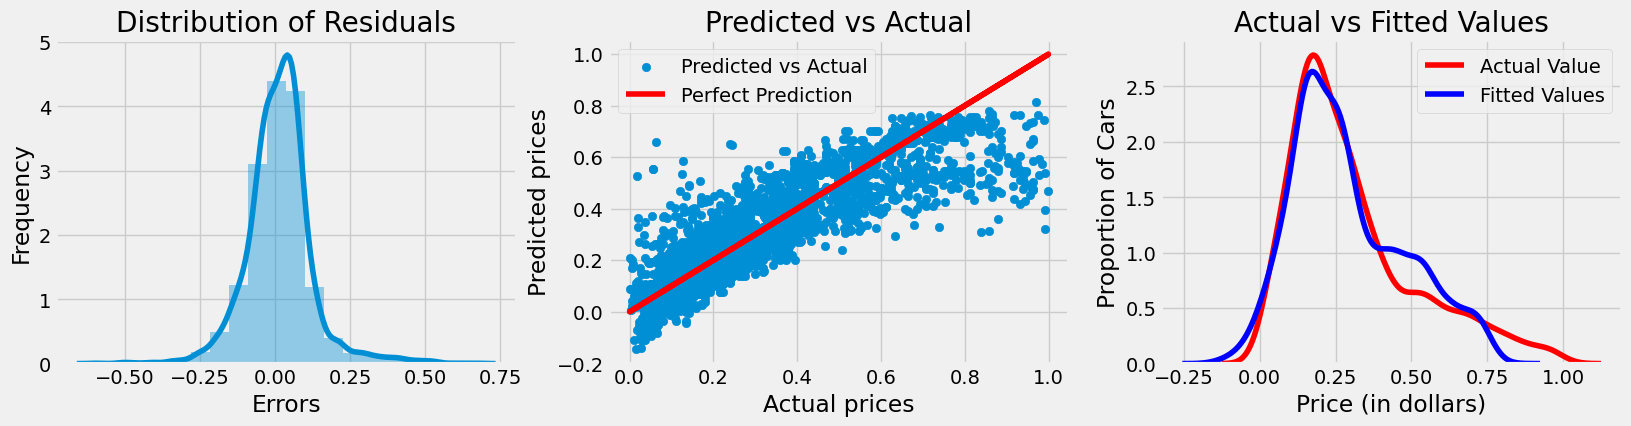

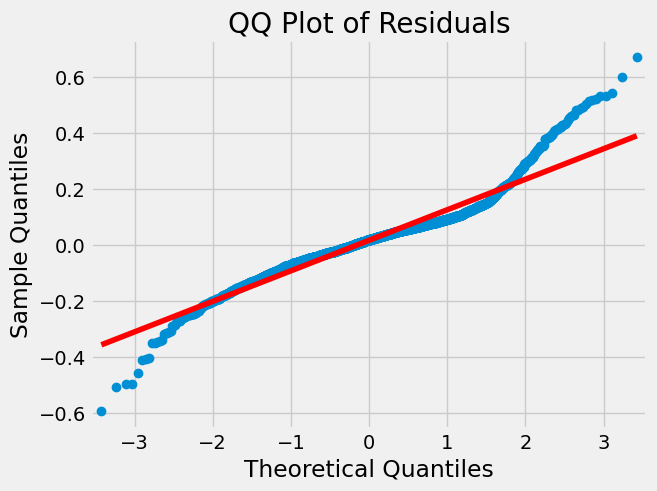

In [60]:
residual_plot(X_train, X_test, y_train, y_test, LinearRegression())

### Features selection 

In [91]:
X_new = feature_selection_vif_pvalues(X_train, y_train)

In [92]:
VIF(X_new)

Features    VIF
0      model 4.8500
1      color 4.5800
2      brand 4.2900
3  body type 3.1000
4   lifespan 2.5600
5   tax type 1.3300

In [93]:
ODL_checking(X_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     3543.
Date:                Fri, 14 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:58:15   Log-Likelihood:                 6034.0
No. Observations:                7577   AIC:                        -1.205e+04
Df Residuals:                    7570   BIC:                        -1.201e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2383      0.006     36.826      0.0

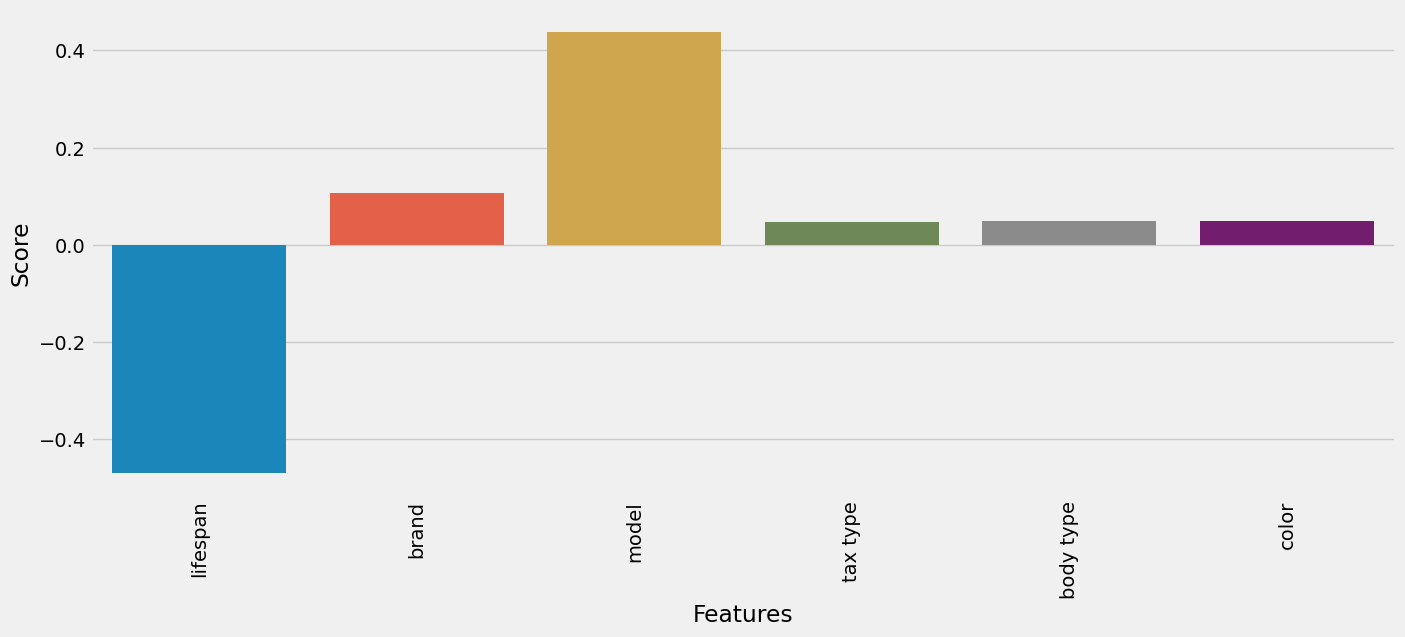

In [94]:
visualize_linear_features_importance(X_new, y_train, LinearRegression())

Normal test: NormaltestResult(statistic=423.49184804171057, pvalue=1.0962601621669216e-92)


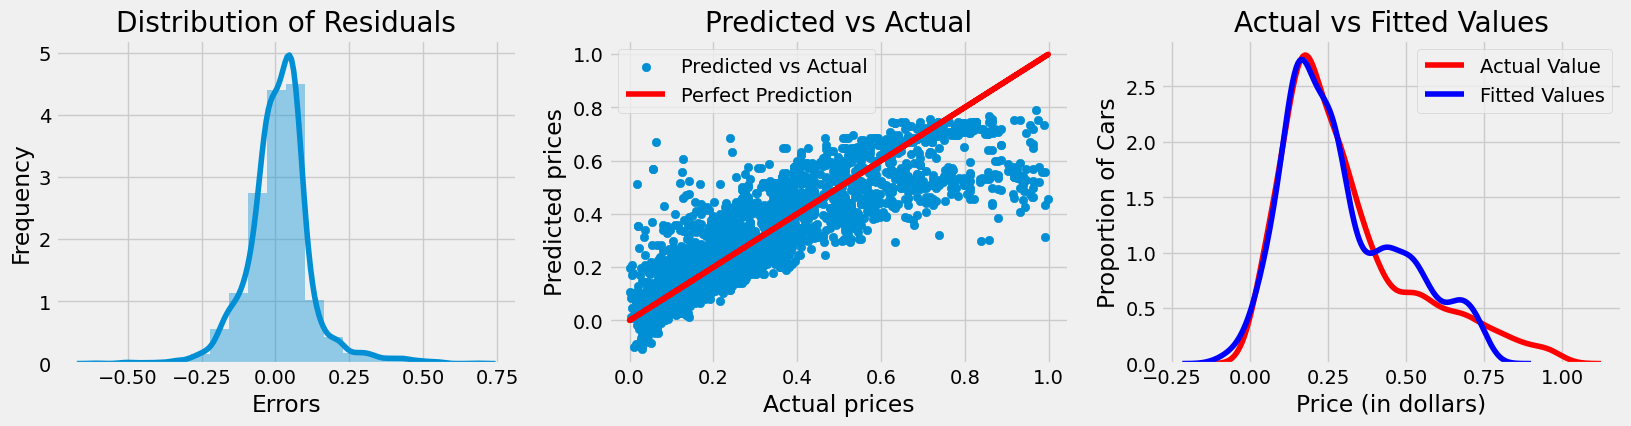

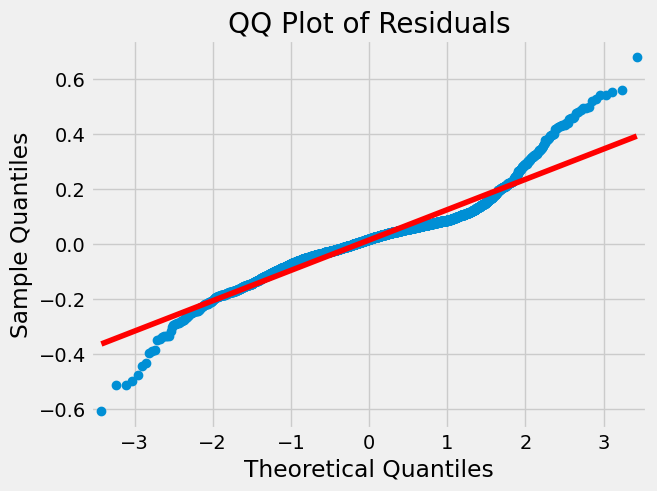

In [95]:
residual_plot(X_new, X_test[X_new.columns.tolist()], y_train, y_test, LinearRegression())

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b><a id = '6.2'>2. Ridge Regressor </a></b> Model</h2>

r2_Score of Ridge(alpha=0.42919342601287785) model on Training Data is: 74.43969801566604
r2_Score of Ridge(alpha=0.42919342601287785) model on Testing Data is: 72.63402000525798
MSE of Ridge(alpha=0.42919342601287785) model on Testing Data is: 0.012119483665355806


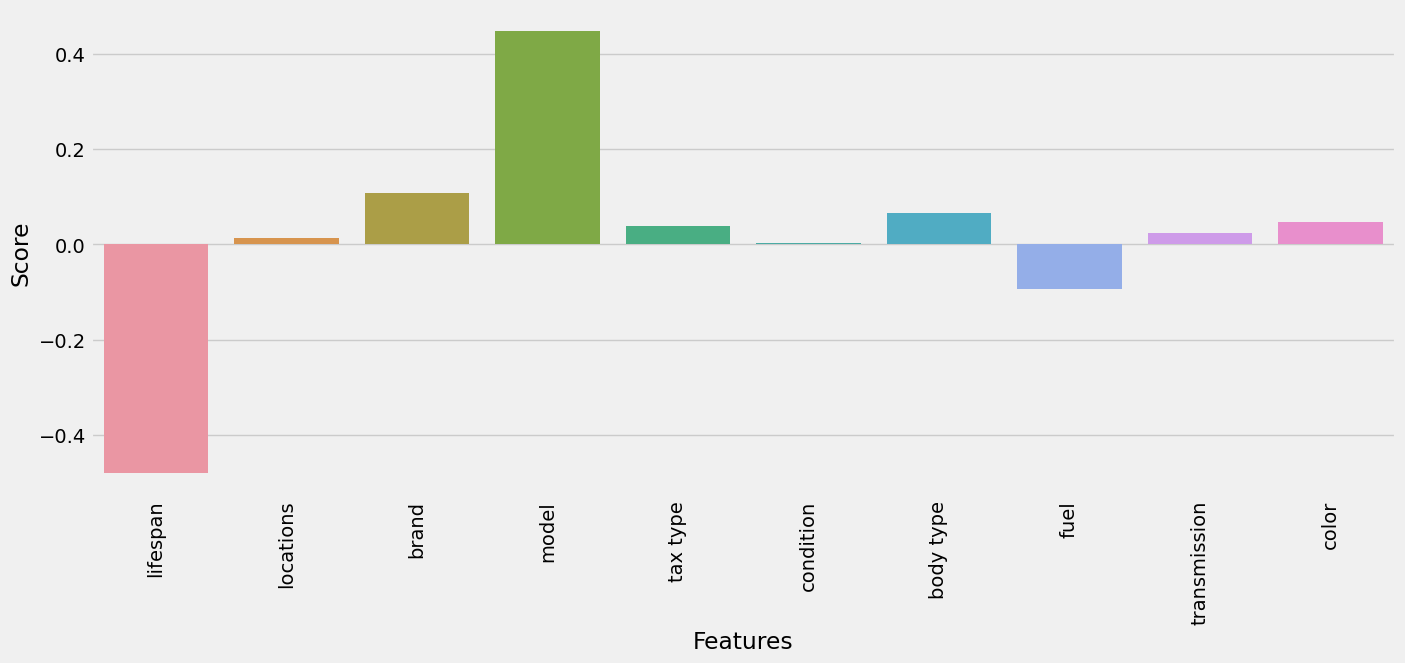

In [69]:
ridgecv = RidgeCV(alphas=np.logspace(-2, 3, num=50))
ridgecv.fit(X_train, y_train)
alpha = ridgecv.alpha_
model_prediction(X_train, X_test, y_train, y_test, Ridge(alpha=alpha), 'Ridge Regression Model',  record=True)
visualize_linear_features_importance(X_train, y_train, Ridge(alpha=alpha))

Normal test: NormaltestResult(statistic=452.48652122799786, pvalue=5.543708008114542e-99)


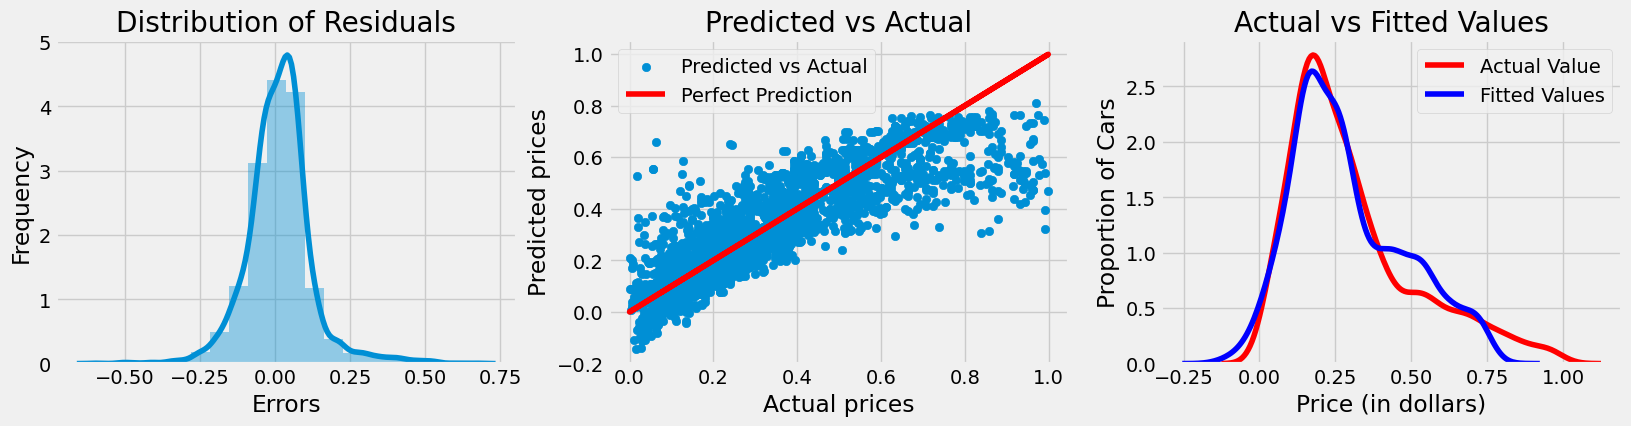

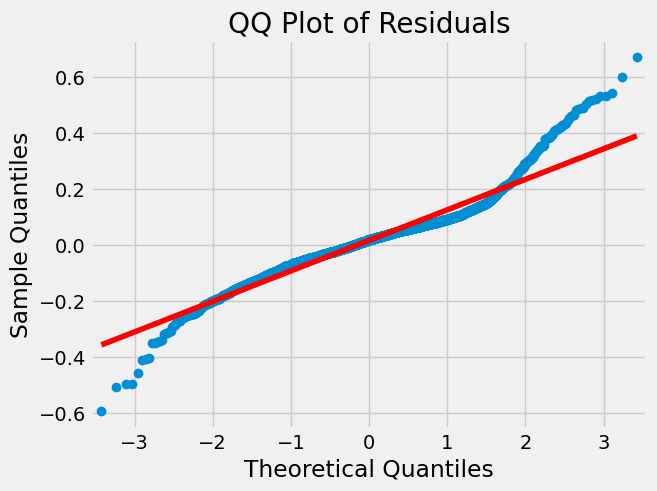

In [71]:
residual_plot(X_train, X_test, y_train, y_test, Ridge(alpha=alpha))

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b><a id = '6.3'>3. Lasso Regressor </a></b> Model</h2>

r2_Score of Lasso(alpha=0.01) model on Training Data is: 64.14708926240222
r2_Score of Lasso(alpha=0.01) model on Testing Data is: 63.75457319777951
MSE of Lasso(alpha=0.01) model on Testing Data is: 0.01605189575369716


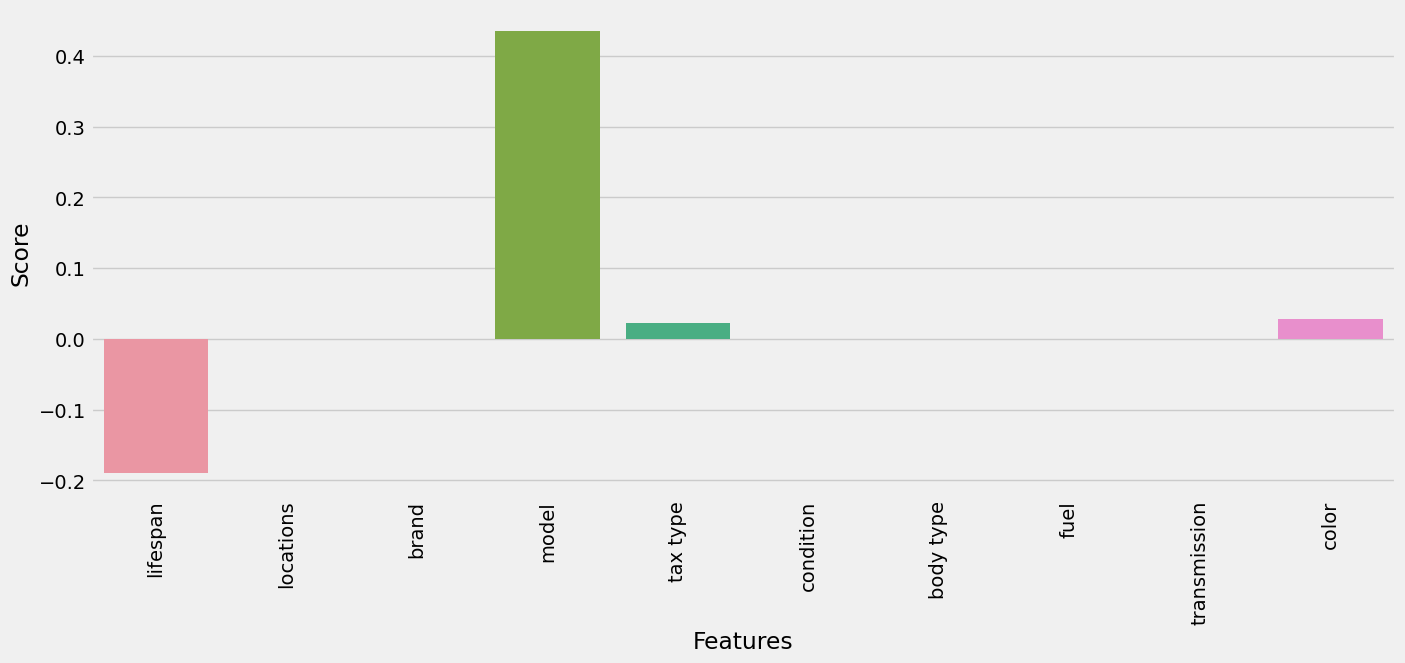

In [72]:
lasso_cv = LassoCV(alphas=np.logspace(-2, 3, num=50))
lasso_cv.fit(X_train, y_train)
alpha = lasso_cv.alpha_
model_prediction(X_train, X_test, y_train, y_test, Lasso(alpha=alpha), 'Lasso Regresion Model',  record=True)

visualize_linear_features_importance(X_train, y_train, Lasso(alpha=alpha))

Normal test: NormaltestResult(statistic=844.0417437835024, pvalue=5.231956077535563e-184)


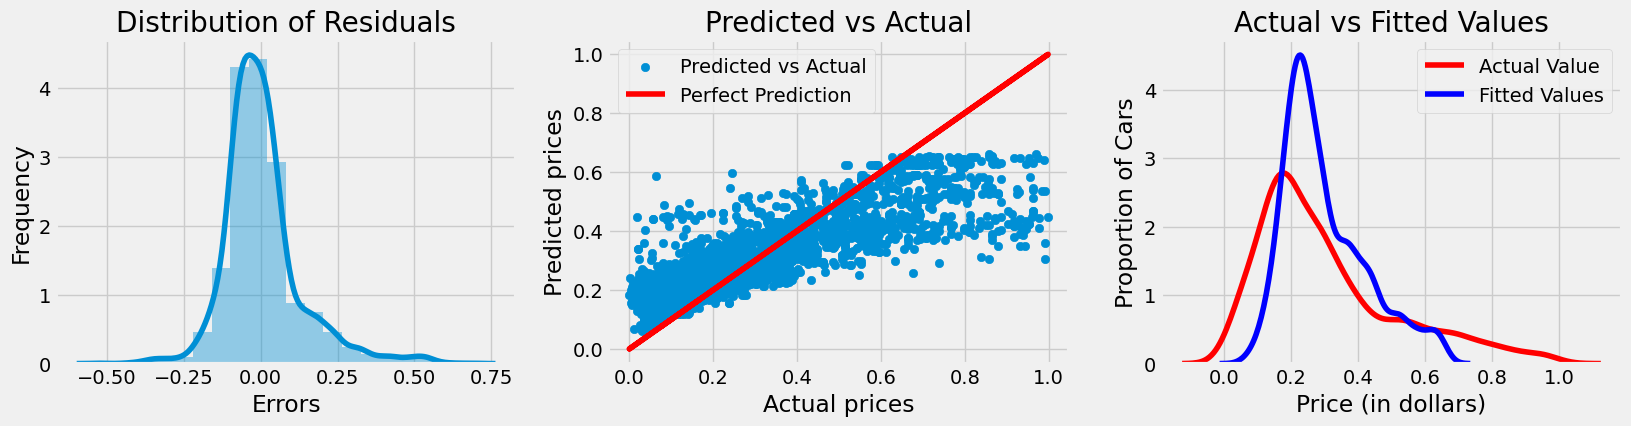

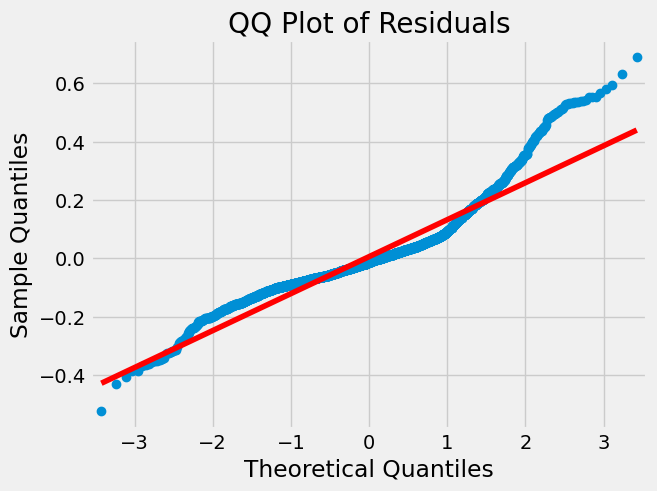

In [74]:
residual_plot(X_train, X_test, y_train, y_test, Lasso(alpha=alpha))

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b><a id = '6.4'>3. Polynormail Regression </a></b> Model</h2>

In [111]:
Input_linear =[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
Input_ridge = [ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',Ridge())]
Input_lasso = [ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',Lasso())]


polynormail = Pipeline(steps=Input_linear)
ridge_poly = Pipeline(Input_ridge)
lasso_poly = Pipeline(Input_lasso)

In [112]:
param_grid = {
    "polynomial__degree": [1, 2, 3]
#     "model__normalize":[True, False]
}
# Input_linear = Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())])
search_poly = GridSearchCV(polynormail, param_grid, n_jobs=1).fit(X_train, y_train)
polynomial_best = search_poly.best_estimator_
model_prediction(X_train, X_test, y_train, y_test, polynomial_best, 'Polynomial Regression Model', record=True)

r2_Score of Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())]) model on Training Data is: 77.90023197882088
r2_Score of Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())]) model on Testing Data is: 74.72231302886816
MSE of Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())]) model on Testing Data is: 0.011194648041234804


### 3.1 Ridge Polynormail 

r2_Score of Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('model', Ridge(alpha=0.10481131341546858))]) model on Training Data is: 80.45650680120046
r2_Score of Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('model', Ridge(alpha=0.10481131341546858))]) model on Testing Data is: 76.70881672529534
MSE of Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('model', Ridge(alpha=0.10481131341546858))]) model on Testing Data is: 0.010314891529513178


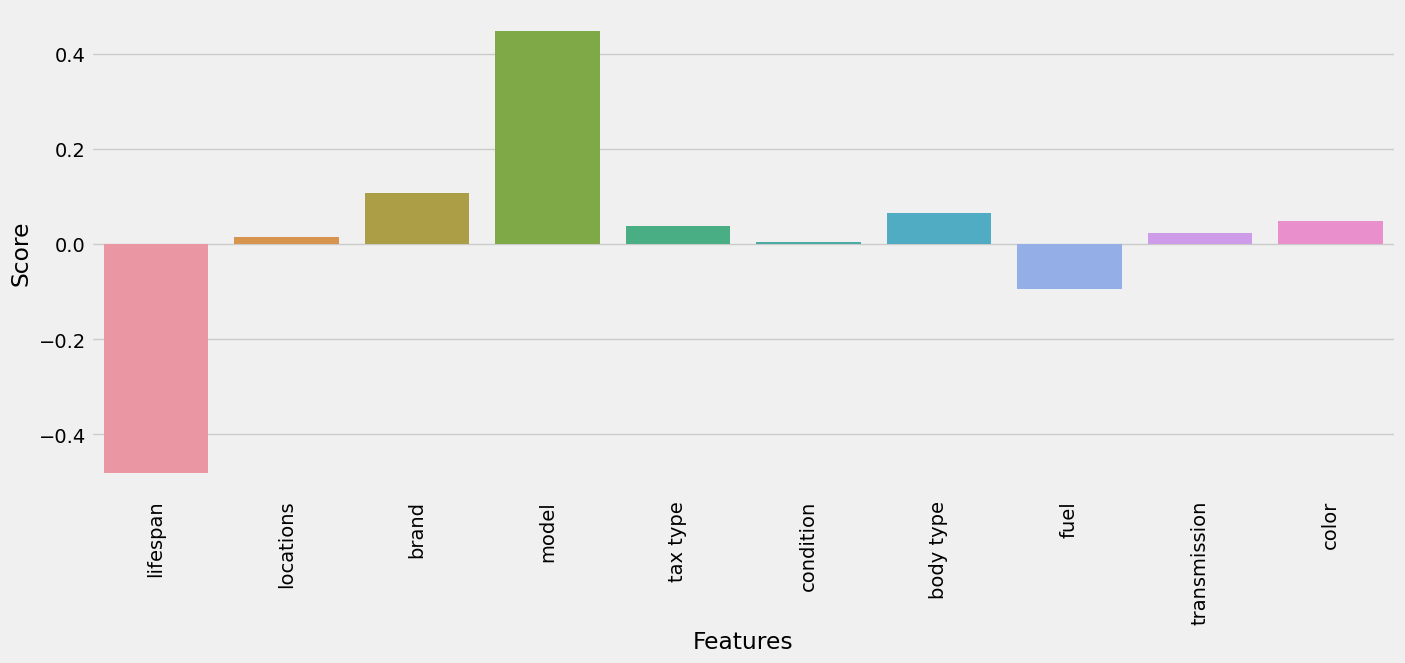

In [123]:
param_grid = {
    "polynomial__degree": [1, 2, 3],
    "model__alpha": np.logspace(-2, 3, num=50)
#     "model__normalize":[True, False]
}
search_ridge = GridSearchCV(ridge_poly, param_grid, n_jobs=1).fit(X_train, y_train)
ridge_best=search_ridge.best_estimator_
model_prediction(X_train, X_test, y_train, y_test,ridge_best, 'Ridge Poly Regresion Model',  record=True)
visualize_linear_features_importance(X_train, y_train, ridge_best)

Normal test: NormaltestResult(statistic=519.9908456058381, pvalue=1.2173698920377653e-113)


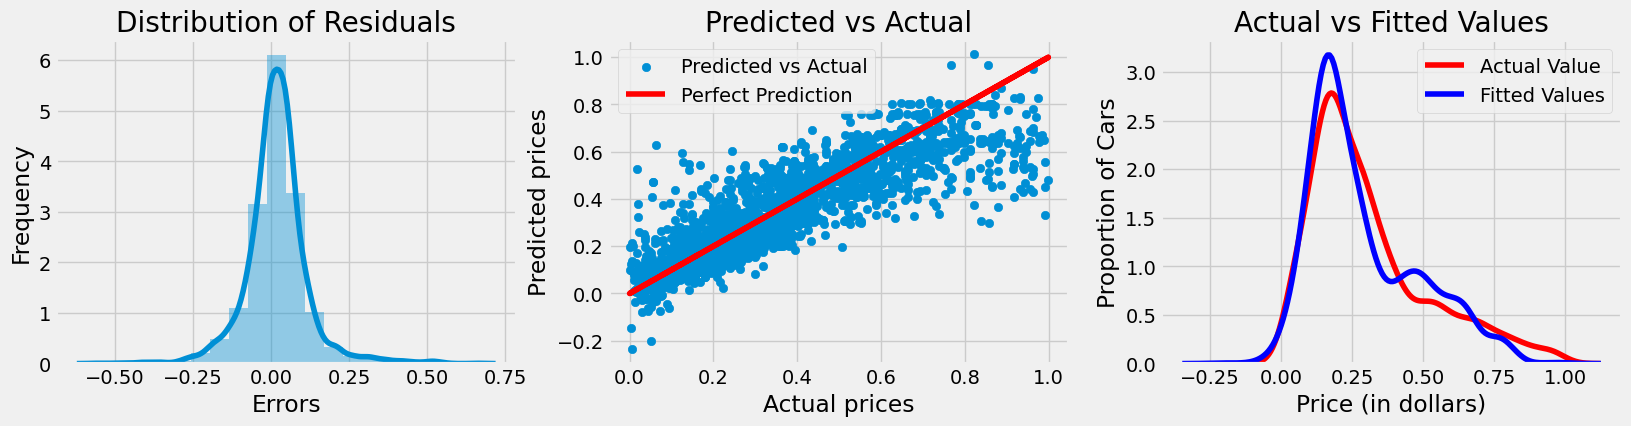

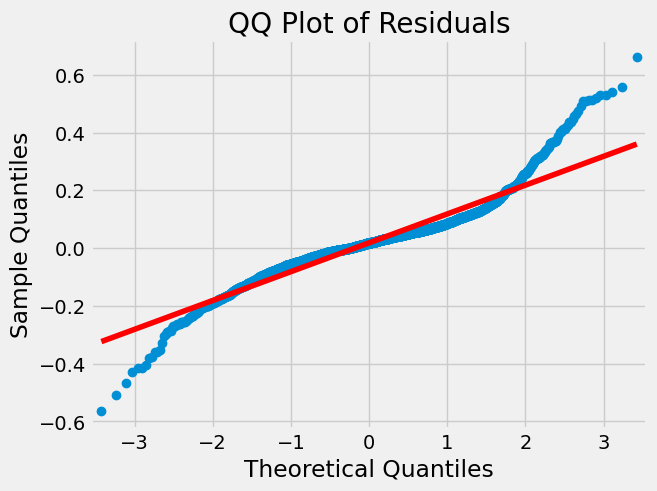

In [130]:
residual_plot(X_train, X_test, y_train, y_test, ridge_best)

### 3.2 Lasso Polynormail 

r2_Score of Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Lasso(alpha=0.01))]) model on Training Data is: 65.27879332419984
r2_Score of Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Lasso(alpha=0.01))]) model on Testing Data is: 64.61091465145041
MSE of Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Lasso(alpha=0.01))]) model on Testing Data is: 0.01567265056453435


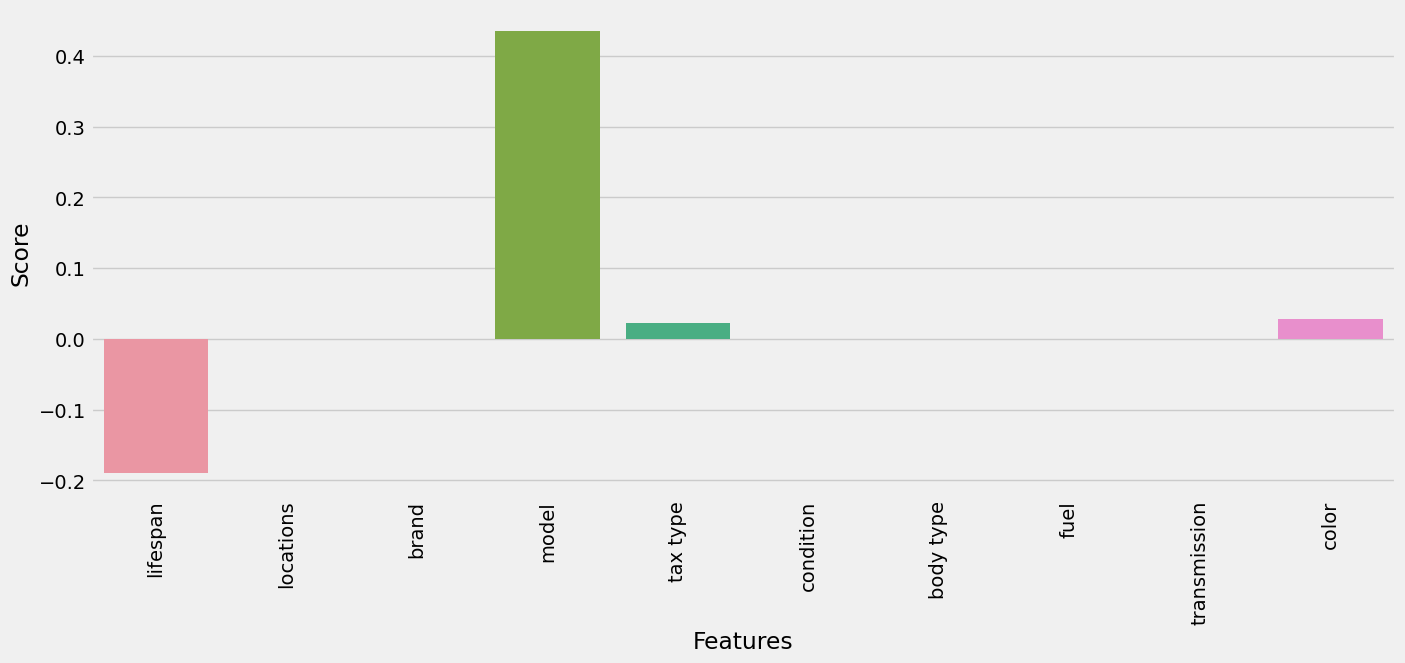

In [125]:
param_grid = {
    "polynomial__degree": [1, 2, 3],
    "model__alpha": np.logspace(-2, 3, num=50)
#     "model__normalize":[True, False]
}
search_lasso = GridSearchCV(lasso_poly, param_grid, n_jobs=1).fit(X_train, y_train)
lasso_best=search_lasso.best_estimator_
model_prediction(X_train, X_test, y_train, y_test,lasso_best, 'Lasso Poly Regresion Model',  record=True)
visualize_linear_features_importance(X_train, y_train, lasso_best)

Normal test: NormaltestResult(statistic=928.6098659972897, pvalue=2.2642776418598114e-202)


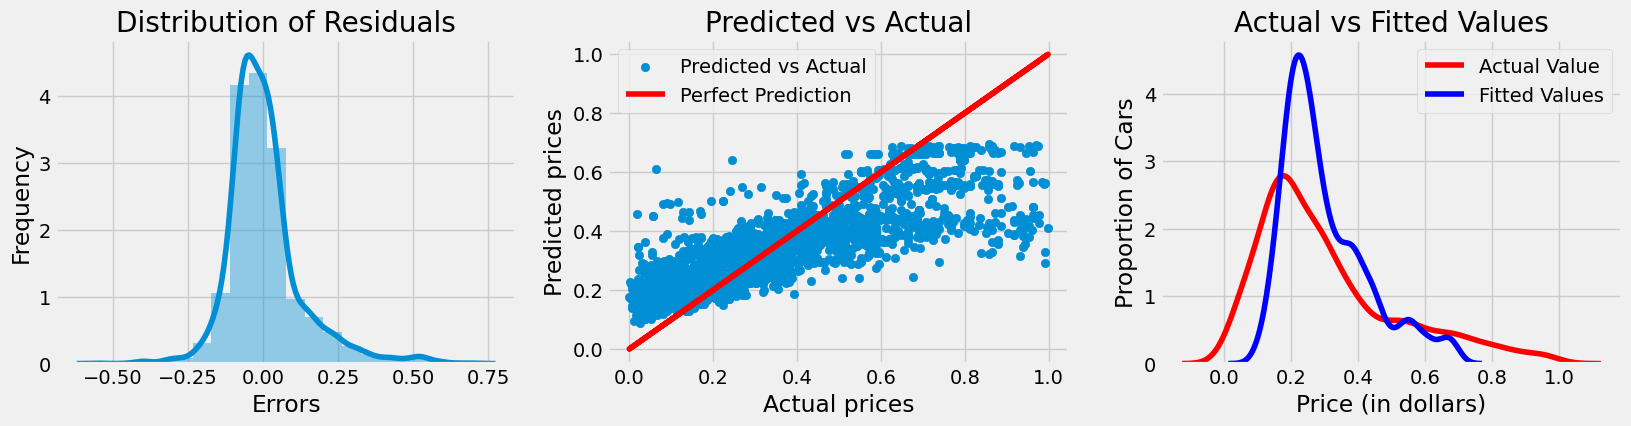

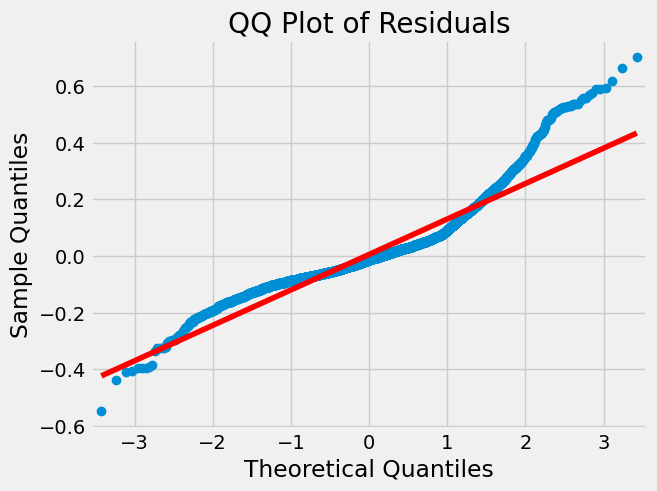

In [129]:
residual_plot(X_train, X_test, y_train, y_test, lasso_best)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
All Model Performance Comparison
</p>
</div>

In [127]:
df_model = pd.DataFrame.from_dict(Algorithms)
df_model

Training Score  Testing Score                   Algorithms
0         74.4398        72.6232      Linear Regression Model
1         74.4397        72.6340       Ridge Regression Model
2         64.1471        63.7546        Lasso Regresion Model
3         77.9002        74.7223  Polynomial Regression Model
4         77.9002        74.7223  Polynomial Regression Model
5         80.4565        76.7088   Ridge Poly Regresion Model
6         80.4565        76.7088   Ridge Poly Regresion Model
7         80.4565        76.7088   Ridge Poly Regresion Model
8         65.2788        64.6109   Lasso Poly Regresion Model

### Plotting above results using column-bar chart.

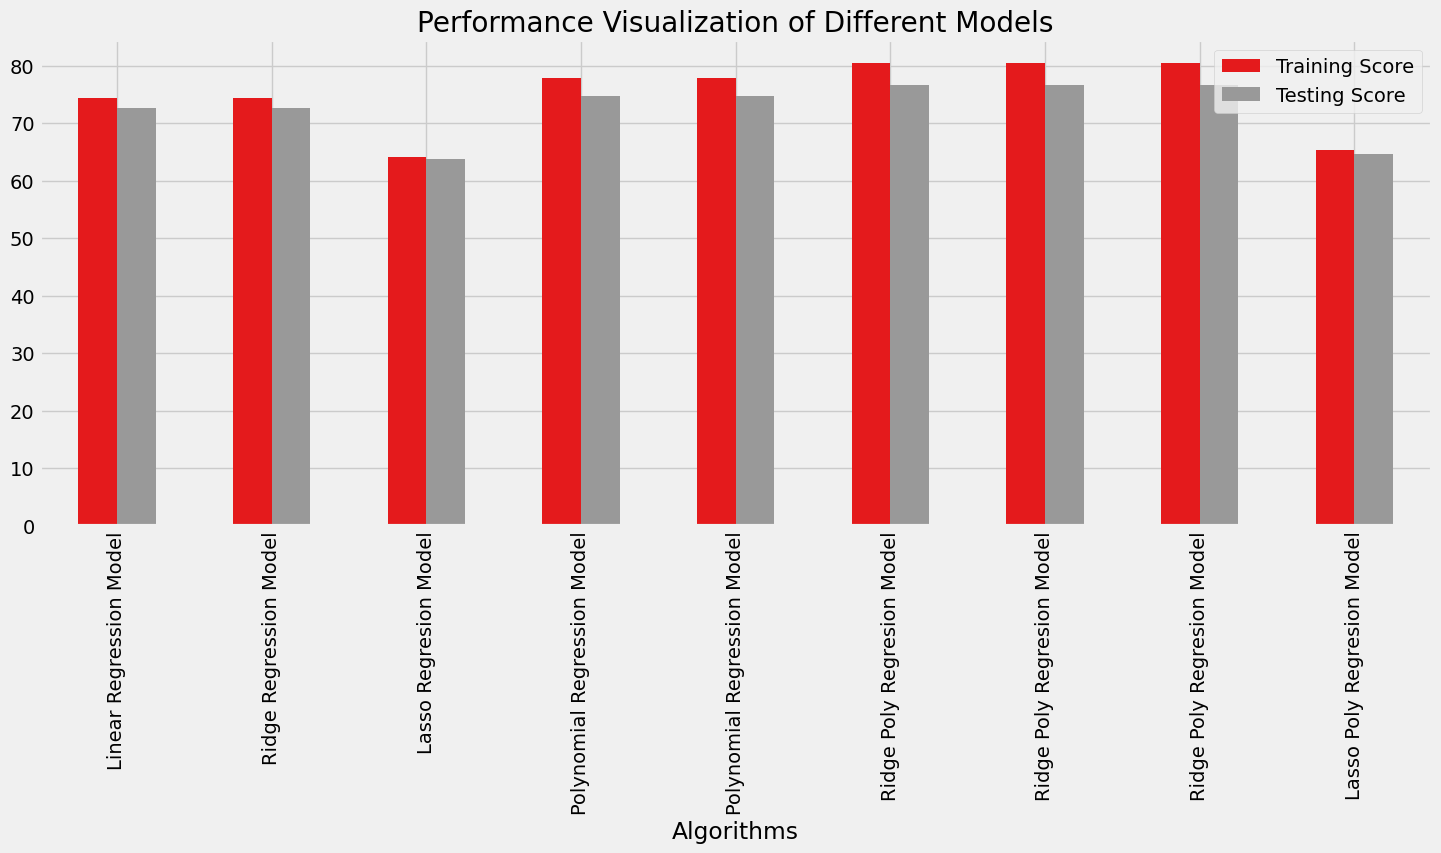

In [128]:
df_model.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
💡 Highest performance was give by Ridge Polynormail Model around 80%.<br>
💡 The models are good enough to predict the carprices which explains the variance of data upto 80% and the model is significant.<br>    
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id = '7'> <span>Conclusion </span></a>
</p>
</div>

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Car Price Prediction with Machine Learning.<br>

<b>Key-Points</b><br>

💡 First we did the <b>Basic Understanding of Data</b><br>
💡 Then we performed <b>Data Cleaning</b> to make the raw data more useable while analysis.<br>
💡 Then we performed <b>Exploratory Data Analysis</b> to generate insights from the data.<br>
💡 Then we performed <b>Data Preprocessing</b> to make data suitable for model training & testing.<br>
💡 Then we trainined our model using different Machine Learning Algorithms.<br>
💡 In the end we came with <b>80% accuracy</b> which was given by <b>Ridge Polynormail Regression model</b>.So we can use this model for predicting price of a car in future.<br>
</div>

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    
    
### <center>Thank you for reading🙂</center>
### <center>If you have any feedback or find anything wrong, please let me know!</center>